In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import random
from tensorflow.keras.utils import load_img, img_to_array

# Verzeichnis mit unseren Trainingsdaten der Klasse 'car'
train_cars_dir = os.path.join('./data/vehicles')
test_cars_dir = os.path.join('./Test/vehicles')
validation_cars_dir = os.path.join('./Validation/vehicles')

# Verzeichnis mit unseren Trainingsdaten der Klasse 'nocar'
train_nocars_dir = os.path.join('./data/non-vehicles')
test_nocars_dir = os.path.join('./Test/non-vehicles')
validation_nocars_dir = os.path.join('./Validation/non-vehicles')



#train_cars_names = os.listdir(train_cars_dir)
#train_nocars_names = os.listdir(train_nocars_dir)

print('Anzahl Bilder im Verzeichnis Cars:', len(os.listdir(train_cars_dir)))
print('Anzahl Bilder im Verzeichnis no Cars:', len(os.listdir(train_nocars_dir)))

/Users/cristobalschmidt/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Anzahl Bilder im Verzeichnis Cars: 6792
Anzahl Bilder im Verzeichnis no Cars: 6968


In [2]:
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Zähle die Anzahl der Bilder im Trainingsverzeichnis
num_train_images = len(os.listdir(train_cars_dir)) + len(os.listdir(train_nocars_dir))

batchsize = 64
epochs = 1000

# Berechne die Schritte pro Epoche
stepsperepoch = int((num_train_images / batchsize)/20)

# Bilder aus dem Trainingsdatensatz fließen in Paketen (batches) von 128 in train_datagen
train_generator = train_datagen.flow_from_directory(
        './data/',  # Quellverzeichnis für Trainingsdaten
        target_size=(64, 64),  # Alle Bilder werden auf 300x300 Pixel skaliert
        batch_size=batchsize,
        # Konfiguriere Labels für eine binäre Klassifikation
        class_mode='binary')

# Bilder aus dem Trainingsdatensatz fließen in Paketen (batches) von 128 in train_datagen
validation_generator = validation_datagen.flow_from_directory(
        './Test/',  # Quellverzeichnis für Trainingsdaten
        target_size=(64, 64),  # Alle Bilder werden auf 300x300 Pixel skaliert
        batch_size=batchsize,
        # Konfiguriere Labels für eine binäre Klassifikation
        class_mode='binary')

Found 13760 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [3]:
model = tf.keras.models.Sequential([
    # Erste Faltungsschicht
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Zweite Faltungsschicht
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Dritte Faltungsschicht
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Vierte Faltungsschicht
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Flatten und Dense-Schicht
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    # Output layer mit einem Künstlichen Neuron, Wertebereich 0-1
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/Users/cristobalschmidt/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 623,265 (2.38 MB)

 Trainable params: 623,265 (2.38 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
history = model.fit(
      train_generator,
      steps_per_epoch=stepsperepoch,  
      epochs=epochs,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)


Epoch 1/1000


/Users/cristobalschmidt/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.4946 - loss: 0.6613 - val_accuracy: 0.7676 - val_loss: 0.5079
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7887 - loss: 0.4716 - val_accuracy: 0.7559 - val_loss: 0.4794
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8309 - loss: 0.4022 - val_accuracy: 0.8242 - val_loss: 0.3522
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8798 - loss: 0.3171 - val_accuracy: 0.8599 - val_loss: 0.2970
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8865 - loss: 0.2774 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 6/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8480 - loss: 0.2784

2024-05-25 21:31:48.150133: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/contextlib.py:135: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(type, value, traceback)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.8610 - loss: 0.2683 - val_accuracy: 0.9297 - val_loss: 0.1915
Epoch 7/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9500 - loss: 0.1581 - val_accuracy: 0.9414 - val_loss: 0.1563
Epoch 8/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9464 - loss: 0.1543 - val_accuracy: 0.8984 - val_loss: 0.2677
Epoch 9/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8932 - loss: 0.3221 - val_accuracy: 0.9310 - val_loss: 0.1652
Epoch 10/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9529 - loss: 0.1532 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 11/1000
 7/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9628 - loss: 0.1458

2024-05-25 21:31:50.161921: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9619 - loss: 0.1399 - val_accuracy: 0.9531 - val_loss: 0.1178
Epoch 12/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9389 - loss: 0.1639 - val_accuracy: 0.9531 - val_loss: 0.1073
Epoch 13/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9736 - loss: 0.0950 - val_accuracy: 0.9609 - val_loss: 0.0998
Epoch 14/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9630 - loss: 0.1093 - val_accuracy: 0.9784 - val_loss: 0.0597
Epoch 15/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9563 - loss: 0.1123 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 16/1000
 7/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9796 - loss: 0.0652

2024-05-25 21:31:52.024083: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9805 - loss: 0.0628 - val_accuracy: 0.9629 - val_loss: 0.1011
Epoch 17/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9736 - loss: 0.0776 - val_accuracy: 0.9102 - val_loss: 0.1971
Epoch 18/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9512 - loss: 0.1329 - val_accuracy: 0.9609 - val_loss: 0.0983
Epoch 19/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9683 - loss: 0.0777 - val_accuracy: 0.9569 - val_loss: 0.1071
Epoch 20/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9784 - loss: 0.0701 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 21/1000
 7/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9656 - loss: 0.0645

2024-05-25 21:31:53.906003: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9669 - loss: 0.0620 - val_accuracy: 0.9824 - val_loss: 0.0939
Epoch 22/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9828 - loss: 0.0486 - val_accuracy: 0.9707 - val_loss: 0.1018
Epoch 23/1000


2024-05-25 21:31:54.502755: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9743 - loss: 0.0800 - val_accuracy: 0.9531 - val_loss: 0.1205
Epoch 24/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9606 - loss: 0.0852 - val_accuracy: 0.9483 - val_loss: 0.1209
Epoch 25/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9643 - loss: 0.0835 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 26/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9769 - loss: 0.0686

2024-05-25 21:31:55.842267: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9733 - loss: 0.0763 - val_accuracy: 0.9688 - val_loss: 0.1012
Epoch 27/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9609 - loss: 0.1056 - val_accuracy: 0.9668 - val_loss: 0.0858
Epoch 28/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9797 - loss: 0.0747 - val_accuracy: 0.9785 - val_loss: 0.0679
Epoch 29/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9797 - loss: 0.0621 - val_accuracy: 0.9806 - val_loss: 0.0785
Epoch 30/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9844 - loss: 0.0378 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 31/1000
 7/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9761 - loss: 0.0794

2024-05-25 21:31:57.730883: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9811 - loss: 0.0669 - val_accuracy: 0.9824 - val_loss: 0.0530
Epoch 32/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9828 - loss: 0.0329 - val_accuracy: 0.9805 - val_loss: 0.0500
Epoch 33/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9904 - loss: 0.0251 - val_accuracy: 0.9688 - val_loss: 0.0805
Epoch 34/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9864 - loss: 0.0431 - val_accuracy: 0.9741 - val_loss: 0.0682
Epoch 35/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9763 - loss: 0.0429 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 36/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9890 - loss: 0.0326

2024-05-25 21:31:59.639150: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9898 - loss: 0.0280 - val_accuracy: 0.9863 - val_loss: 0.0593
Epoch 37/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9854 - loss: 0.0307 - val_accuracy: 0.9668 - val_loss: 0.0905
Epoch 38/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9843 - loss: 0.0670 - val_accuracy: 0.9844 - val_loss: 0.0447
Epoch 39/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9790 - loss: 0.0564 - val_accuracy: 0.9849 - val_loss: 0.0338
Epoch 40/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9959 - loss: 0.0238 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 41/1000
 7/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9954 - loss: 0.0211

2024-05-25 21:32:01.517377: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9952 - loss: 0.0211 - val_accuracy: 0.9805 - val_loss: 0.0520
Epoch 42/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9948 - loss: 0.0170 - val_accuracy: 0.9844 - val_loss: 0.0464
Epoch 43/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9912 - loss: 0.0215 - val_accuracy: 0.9746 - val_loss: 0.0658
Epoch 44/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9874 - loss: 0.0594 - val_accuracy: 0.9914 - val_loss: 0.0196
Epoch 45/1000


2024-05-25 21:32:02.905625: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9953 - loss: 0.0249 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 46/1000
 7/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9871 - loss: 0.0277

2024-05-25 21:32:03.423146: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9890 - loss: 0.0247 - val_accuracy: 0.9863 - val_loss: 0.0348
Epoch 47/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9865 - loss: 0.0302 - val_accuracy: 0.9883 - val_loss: 0.0362
Epoch 48/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9934 - loss: 0.0179 - val_accuracy: 0.9844 - val_loss: 0.0472
Epoch 49/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9813 - loss: 0.0501 - val_accuracy: 0.9784 - val_loss: 0.0588
Epoch 50/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9838 - loss: 0.0403 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 51/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9931 - loss: 0.0333

2024-05-25 21:32:05.348629: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9918 - loss: 0.0359 - val_accuracy: 0.9766 - val_loss: 0.0601
Epoch 52/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9942 - loss: 0.0167 - val_accuracy: 0.9922 - val_loss: 0.0219
Epoch 53/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9853 - loss: 0.0376 - val_accuracy: 0.9766 - val_loss: 0.0455
Epoch 54/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9944 - loss: 0.0168 - val_accuracy: 0.9871 - val_loss: 0.0393
Epoch 55/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9869 - loss: 0.0421 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 56/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9842 - loss: 0.0370

2024-05-25 21:32:07.322022: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9858 - loss: 0.0360 - val_accuracy: 0.9961 - val_loss: 0.0194
Epoch 57/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9980 - loss: 0.0158 - val_accuracy: 0.9883 - val_loss: 0.0315
Epoch 58/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9863 - loss: 0.0318 - val_accuracy: 0.9844 - val_loss: 0.0302
Epoch 59/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9946 - loss: 0.0281 - val_accuracy: 0.9871 - val_loss: 0.0599
Epoch 60/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9909 - loss: 0.0279 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 61/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9969 - loss: 0.0133

2024-05-25 21:32:09.278157: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9943 - loss: 0.0173 - val_accuracy: 0.9629 - val_loss: 0.0901
Epoch 62/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9926 - loss: 0.0246 - val_accuracy: 0.9902 - val_loss: 0.0247
Epoch 63/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9906 - loss: 0.0396 - val_accuracy: 0.9883 - val_loss: 0.0239
Epoch 64/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9932 - loss: 0.0187 - val_accuracy: 0.9784 - val_loss: 0.0583
Epoch 65/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9962 - loss: 0.0163 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 66/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9973 - loss: 0.0135

2024-05-25 21:32:11.260051: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-25 21:32:11.423325: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9940 - loss: 0.0198 - val_accuracy: 0.9844 - val_loss: 0.0498
Epoch 67/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9972 - loss: 0.0080 - val_accuracy: 0.9668 - val_loss: 0.0855
Epoch 68/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9904 - loss: 0.0293 - val_accuracy: 0.9883 - val_loss: 0.0291
Epoch 69/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9993 - loss: 0.0095 - val_accuracy: 0.9871 - val_loss: 0.0407
Epoch 70/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9875 - loss: 0.0498 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 71/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9940 - loss: 0.0130

2024-05-25 21:32:13.241179: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9889 - loss: 0.0245 - val_accuracy: 0.9883 - val_loss: 0.0358
Epoch 72/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9925 - loss: 0.0257 - val_accuracy: 0.9707 - val_loss: 0.0840
Epoch 73/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9798 - loss: 0.0400 - val_accuracy: 0.9785 - val_loss: 0.0635
Epoch 74/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9815 - loss: 0.0428 - val_accuracy: 0.9914 - val_loss: 0.0265
Epoch 75/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9901 - loss: 0.0231 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 76/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9765 - loss: 0.0390

2024-05-25 21:32:15.274851: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9819 - loss: 0.0343 - val_accuracy: 0.9922 - val_loss: 0.0158
Epoch 77/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9950 - loss: 0.0108 - val_accuracy: 0.9902 - val_loss: 0.0195
Epoch 78/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9933 - loss: 0.0160 - val_accuracy: 0.9941 - val_loss: 0.0125
Epoch 79/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9954 - loss: 0.0151 - val_accuracy: 0.9892 - val_loss: 0.0432
Epoch 80/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9979 - loss: 0.0122 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 81/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9966 - loss: 0.0122

2024-05-25 21:32:17.277891: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9945 - loss: 0.0168 - val_accuracy: 0.9922 - val_loss: 0.0240
Epoch 82/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9972 - loss: 0.0109 - val_accuracy: 0.9883 - val_loss: 0.0374
Epoch 83/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9909 - loss: 0.0278 - val_accuracy: 0.9980 - val_loss: 0.0088
Epoch 84/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9956 - loss: 0.0152 - val_accuracy: 0.9871 - val_loss: 0.0490
Epoch 85/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9877 - loss: 0.0296 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 86/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9937 - loss: 0.0144

2024-05-25 21:32:19.341926: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9929 - loss: 0.0165 - val_accuracy: 0.9805 - val_loss: 0.0420
Epoch 87/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9959 - loss: 0.0120 - val_accuracy: 0.9922 - val_loss: 0.0178
Epoch 88/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9949 - loss: 0.0259 - val_accuracy: 0.9824 - val_loss: 0.0372
Epoch 89/1000


2024-05-25 21:32:20.397671: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9874 - loss: 0.0503 - val_accuracy: 0.9892 - val_loss: 0.0270
Epoch 90/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9993 - loss: 0.0072 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 91/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9954 - loss: 0.0133

2024-05-25 21:32:21.360075: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9958 - loss: 0.0161 - val_accuracy: 0.9941 - val_loss: 0.0176
Epoch 92/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9962 - loss: 0.0125 - val_accuracy: 0.9863 - val_loss: 0.0376
Epoch 93/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9882 - loss: 0.0321 - val_accuracy: 0.9863 - val_loss: 0.0438
Epoch 94/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9940 - loss: 0.0187 - val_accuracy: 0.9957 - val_loss: 0.0148
Epoch 95/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9935 - loss: 0.0124 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 96/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9921 - loss: 0.0165

2024-05-25 21:32:23.398299: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9932 - loss: 0.0136 - val_accuracy: 0.9883 - val_loss: 0.0581
Epoch 97/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9957 - loss: 0.0095 - val_accuracy: 0.9961 - val_loss: 0.0188
Epoch 98/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9934 - loss: 0.0235 - val_accuracy: 0.9941 - val_loss: 0.0106
Epoch 99/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9894 - loss: 0.0228 - val_accuracy: 0.9763 - val_loss: 0.0671
Epoch 100/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9907 - loss: 0.0335 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 101/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9811 - loss: 0.0824

2024-05-25 21:32:25.471386: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9861 - loss: 0.0553 - val_accuracy: 0.9844 - val_loss: 0.0427
Epoch 102/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9948 - loss: 0.0149 - val_accuracy: 0.9922 - val_loss: 0.0209
Epoch 103/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9958 - loss: 0.0101 - val_accuracy: 0.9863 - val_loss: 0.0351
Epoch 104/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9904 - loss: 0.0361 - val_accuracy: 0.9914 - val_loss: 0.0268
Epoch 105/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9875 - loss: 0.0209 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 106/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9960 - loss: 0.0317

2024-05-25 21:32:27.514957: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9937 - loss: 0.0325 - val_accuracy: 0.9961 - val_loss: 0.0144
Epoch 107/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9944 - loss: 0.0139 - val_accuracy: 0.9980 - val_loss: 0.0109
Epoch 108/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9983 - loss: 0.0080 - val_accuracy: 0.9902 - val_loss: 0.0369
Epoch 109/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.0000 - loss: 0.0051 - val_accuracy: 0.9806 - val_loss: 0.0595
Epoch 110/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9929 - loss: 0.0144 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 111/1000
 1/10 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - accuracy: 1.0000 - loss: 0.0012

2024-05-25 21:32:29.524268: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-25 21:32:29.526656: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.9993 - loss: 0.0046 - val_accuracy: 0.9922 - val_loss: 0.0163
Epoch 112/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9977 - loss: 0.0089 - val_accuracy: 0.9844 - val_loss: 0.0632
Epoch 113/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9943 - loss: 0.0153 - val_accuracy: 0.9922 - val_loss: 0.0308
Epoch 114/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9828 - loss: 0.0441 - val_accuracy: 0.9914 - val_loss: 0.0240
Epoch 115/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9933 - loss: 0.0090 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 116/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9960 - loss: 0.0063

2024-05-25 21:32:31.917658: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9954 - loss: 0.0084 - val_accuracy: 0.9883 - val_loss: 0.0247
Epoch 117/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9954 - loss: 0.0162 - val_accuracy: 0.9844 - val_loss: 0.0533
Epoch 118/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9942 - loss: 0.0153 - val_accuracy: 0.9980 - val_loss: 0.0080
Epoch 119/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9914 - loss: 0.0148 - val_accuracy: 0.9871 - val_loss: 0.0271
Epoch 120/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9978 - loss: 0.0084 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 121/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9915 - loss: 0.0168

2024-05-25 21:32:34.132782: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.9931 - loss: 0.0155 - val_accuracy: 0.9883 - val_loss: 0.0265
Epoch 122/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9959 - loss: 0.0077 - val_accuracy: 0.9844 - val_loss: 0.0427
Epoch 123/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9932 - loss: 0.0134 - val_accuracy: 0.9980 - val_loss: 0.0066
Epoch 124/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9983 - loss: 0.0043 - val_accuracy: 0.9978 - val_loss: 0.0112
Epoch 125/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 0.0056 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 126/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9889 - loss: 0.0348

2024-05-25 21:32:36.413520: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9921 - loss: 0.0262 - val_accuracy: 0.9961 - val_loss: 0.0211
Epoch 127/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9963 - loss: 0.0078 - val_accuracy: 0.9941 - val_loss: 0.0134
Epoch 128/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9936 - loss: 0.0107 - val_accuracy: 0.9863 - val_loss: 0.0444
Epoch 129/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9987 - loss: 0.0074 - val_accuracy: 0.9892 - val_loss: 0.0419
Epoch 130/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9923 - loss: 0.0201 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 131/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9877 - loss: 0.0284

2024-05-25 21:32:38.638901: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9791 - loss: 0.0423 - val_accuracy: 0.9395 - val_loss: 0.1595
Epoch 132/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9809 - loss: 0.0490 - val_accuracy: 0.9746 - val_loss: 0.0690
Epoch 133/1000


2024-05-25 21:32:39.355550: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9821 - loss: 0.0431 - val_accuracy: 0.9922 - val_loss: 0.0241
Epoch 134/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9918 - loss: 0.0247 - val_accuracy: 0.9892 - val_loss: 0.0249
Epoch 135/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9940 - loss: 0.0176 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 136/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9931 - loss: 0.0211

2024-05-25 21:32:40.956704: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.9893 - loss: 0.0259 - val_accuracy: 0.9824 - val_loss: 0.0360
Epoch 137/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9903 - loss: 0.0204 - val_accuracy: 0.9902 - val_loss: 0.0372
Epoch 138/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9936 - loss: 0.0179 - val_accuracy: 0.9863 - val_loss: 0.0458
Epoch 139/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9922 - loss: 0.0168 - val_accuracy: 0.9914 - val_loss: 0.0333
Epoch 140/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9972 - loss: 0.0081 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 141/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9986 - loss: 0.0066   

2024-05-25 21:32:43.160127: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9979 - loss: 0.0099 - val_accuracy: 0.9863 - val_loss: 0.0332
Epoch 142/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9977 - loss: 0.0102 - val_accuracy: 0.9844 - val_loss: 0.0377
Epoch 143/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9934 - loss: 0.0232 - val_accuracy: 0.9727 - val_loss: 0.0701
Epoch 144/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9910 - loss: 0.0223 - val_accuracy: 0.9935 - val_loss: 0.0261
Epoch 145/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9863 - loss: 0.0436 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 146/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9976 - loss: 0.0096

2024-05-25 21:32:45.273862: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9970 - loss: 0.0114 - val_accuracy: 0.9844 - val_loss: 0.0429
Epoch 147/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9965 - loss: 0.0125 - val_accuracy: 0.9922 - val_loss: 0.0304
Epoch 148/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9984 - loss: 0.0084 - val_accuracy: 0.9805 - val_loss: 0.0594
Epoch 149/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9981 - loss: 0.0098 - val_accuracy: 0.9935 - val_loss: 0.0157
Epoch 150/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9987 - loss: 0.0031 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 151/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9915 - loss: 0.0350

2024-05-25 21:32:47.428495: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9916 - loss: 0.0275 - val_accuracy: 0.9824 - val_loss: 0.0686
Epoch 152/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9919 - loss: 0.0247 - val_accuracy: 0.9941 - val_loss: 0.0212
Epoch 153/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9982 - loss: 0.0123 - val_accuracy: 0.9961 - val_loss: 0.0107
Epoch 154/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9916 - loss: 0.0185 - val_accuracy: 0.9849 - val_loss: 0.0431
Epoch 155/1000


2024-05-25 21:32:49.045802: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9935 - loss: 0.0151 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 156/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9961 - loss: 0.0173

2024-05-25 21:32:49.599428: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9958 - loss: 0.0176 - val_accuracy: 0.9883 - val_loss: 0.0347
Epoch 157/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9903 - loss: 0.0175 - val_accuracy: 0.9941 - val_loss: 0.0196
Epoch 158/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9886 - loss: 0.0214 - val_accuracy: 0.9922 - val_loss: 0.0197
Epoch 159/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9931 - loss: 0.0228 - val_accuracy: 0.9914 - val_loss: 0.0267
Epoch 160/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9991 - loss: 0.0075 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 161/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 0.0035   

2024-05-25 21:32:51.744047: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 0.9941 - val_loss: 0.0129
Epoch 162/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9927 - loss: 0.0190 - val_accuracy: 0.9902 - val_loss: 0.0182
Epoch 163/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9944 - loss: 0.0119 - val_accuracy: 0.9980 - val_loss: 0.0061
Epoch 164/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9935 - loss: 0.0142 - val_accuracy: 0.9957 - val_loss: 0.0099
Epoch 165/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9976 - loss: 0.0100 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 166/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9929 - loss: 0.0279

2024-05-25 21:32:53.929291: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9935 - loss: 0.0205 - val_accuracy: 0.9902 - val_loss: 0.0227
Epoch 167/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9992 - loss: 0.0076 - val_accuracy: 0.9961 - val_loss: 0.0136
Epoch 168/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9996 - loss: 0.0041 - val_accuracy: 0.9941 - val_loss: 0.0102
Epoch 169/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9971 - loss: 0.0104 - val_accuracy: 0.9957 - val_loss: 0.0134
Epoch 170/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9978 - loss: 0.0030 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 171/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 4.9298e-04

2024-05-25 21:32:56.108206: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.9997 - loss: 0.0012 - val_accuracy: 0.9922 - val_loss: 0.0244
Epoch 172/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9961 - loss: 0.0076 - val_accuracy: 0.9883 - val_loss: 0.0347
Epoch 173/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9931 - loss: 0.0079 - val_accuracy: 0.9902 - val_loss: 0.0364
Epoch 174/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9992 - loss: 0.0034 - val_accuracy: 0.9935 - val_loss: 0.0220
Epoch 175/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9980 - loss: 0.0070 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 176/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 0.0014

2024-05-25 21:32:58.283010: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-25 21:32:58.462583: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.9922 - val_loss: 0.0166
Epoch 177/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.9967 - loss: 0.0140 - val_accuracy: 0.9961 - val_loss: 0.0194
Epoch 178/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9983 - loss: 0.0067 - val_accuracy: 0.9941 - val_loss: 0.0132
Epoch 179/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9996 - loss: 0.0041 - val_accuracy: 0.9978 - val_loss: 0.0068
Epoch 180/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9987 - loss: 0.0037 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 181/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9960 - loss: 0.0060

2024-05-25 21:33:00.536808: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.9961 - loss: 0.0093 - val_accuracy: 0.9961 - val_loss: 0.0149
Epoch 182/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.9902 - val_loss: 0.0261
Epoch 183/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9978 - loss: 0.0064 - val_accuracy: 0.9902 - val_loss: 0.0249
Epoch 184/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.9935 - val_loss: 0.0191
Epoch 185/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 9.1969e-04 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 186/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9986 - loss: 0.0018    

2024-05-25 21:33:02.714118: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9983 - loss: 0.0021 - val_accuracy: 0.9961 - val_loss: 0.0126
Epoch 187/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9961 - loss: 0.0089 - val_accuracy: 0.9844 - val_loss: 0.0460
Epoch 188/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 0.0071 - val_accuracy: 0.9922 - val_loss: 0.0279
Epoch 189/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9983 - loss: 0.0056 - val_accuracy: 0.9892 - val_loss: 0.0470
Epoch 190/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9942 - loss: 0.0125 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 191/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 7.1641e-04

2024-05-25 21:33:04.942915: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9997 - loss: 0.0018 - val_accuracy: 0.9883 - val_loss: 0.0388
Epoch 192/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9932 - loss: 0.0143 - val_accuracy: 0.9824 - val_loss: 0.0953
Epoch 193/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9865 - loss: 0.0351 - val_accuracy: 0.9922 - val_loss: 0.0367
Epoch 194/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9921 - loss: 0.0234 - val_accuracy: 0.9914 - val_loss: 0.0295
Epoch 195/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9957 - loss: 0.0139 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 196/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9947 - loss: 0.0328

2024-05-25 21:33:07.199896: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9944 - loss: 0.0279 - val_accuracy: 0.9883 - val_loss: 0.0348
Epoch 197/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9986 - loss: 0.0080 - val_accuracy: 0.9922 - val_loss: 0.0200
Epoch 198/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9981 - loss: 0.0092 - val_accuracy: 0.9941 - val_loss: 0.0184
Epoch 199/1000


2024-05-25 21:33:08.352869: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9935 - loss: 0.0174 - val_accuracy: 0.9957 - val_loss: 0.0086
Epoch 200/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9980 - loss: 0.0151 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 201/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 0.0036

2024-05-25 21:33:09.394272: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 0.9941 - val_loss: 0.0139
Epoch 202/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9968 - loss: 0.0075 - val_accuracy: 0.9902 - val_loss: 0.0310
Epoch 203/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9952 - loss: 0.0131 - val_accuracy: 0.9980 - val_loss: 0.0202
Epoch 204/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9945 - loss: 0.0092 - val_accuracy: 0.9914 - val_loss: 0.0324
Epoch 205/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9944 - loss: 0.0114 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 206/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 0.0042

2024-05-25 21:33:11.616628: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9981 - loss: 0.0073 - val_accuracy: 0.9941 - val_loss: 0.0221
Epoch 207/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9922 - loss: 0.0152 - val_accuracy: 0.9902 - val_loss: 0.0267
Epoch 208/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9989 - loss: 0.0030 - val_accuracy: 0.9922 - val_loss: 0.0302
Epoch 209/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9981 - loss: 0.0037 - val_accuracy: 0.9957 - val_loss: 0.0225
Epoch 210/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9908 - loss: 0.0160 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 211/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9960 - loss: 0.0099

2024-05-25 21:33:13.869270: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.9953 - loss: 0.0115 - val_accuracy: 0.9902 - val_loss: 0.0367
Epoch 212/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9950 - loss: 0.0142 - val_accuracy: 0.9922 - val_loss: 0.0303
Epoch 213/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9961 - loss: 0.0043 - val_accuracy: 0.9902 - val_loss: 0.0311
Epoch 214/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9987 - loss: 0.0086 - val_accuracy: 0.9892 - val_loss: 0.0349
Epoch 215/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9963 - loss: 0.0101 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 216/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9897 - loss: 0.0132

2024-05-25 21:33:16.148446: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9911 - loss: 0.0123 - val_accuracy: 0.9961 - val_loss: 0.0266
Epoch 217/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9961 - loss: 0.0063 - val_accuracy: 1.0000 - val_loss: 0.0055
Epoch 218/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.9922 - val_loss: 0.0409
Epoch 219/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.9957 - val_loss: 0.0075
Epoch 220/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 221/1000
 1/10 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - accuracy: 1.0000 - loss: 3.4169e-04

2024-05-25 21:33:18.255041: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-25 21:33:18.257423: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9978 - loss: 0.0034 - val_accuracy: 0.9980 - val_loss: 0.0082
Epoch 222/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9983 - loss: 0.0062 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 223/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9989 - loss: 0.0018 - val_accuracy: 0.9961 - val_loss: 0.0063
Epoch 224/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9965 - loss: 0.0083 - val_accuracy: 0.9935 - val_loss: 0.0316
Epoch 225/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9971 - loss: 0.0042 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 226/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9986 - loss: 0.0030

2024-05-25 21:33:20.607090: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9983 - loss: 0.0032 - val_accuracy: 0.9922 - val_loss: 0.0162
Epoch 227/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9955 - loss: 0.0086 - val_accuracy: 0.9941 - val_loss: 0.0105
Epoch 228/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9994 - loss: 0.0074 - val_accuracy: 0.9902 - val_loss: 0.0516
Epoch 229/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9992 - loss: 0.0079 - val_accuracy: 0.9892 - val_loss: 0.0312
Epoch 230/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9987 - loss: 0.0060 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 231/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9994 - loss: 0.0032    

2024-05-25 21:33:22.834506: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.9987 - loss: 0.0057 - val_accuracy: 0.9863 - val_loss: 0.0689
Epoch 232/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9932 - loss: 0.0174 - val_accuracy: 0.9941 - val_loss: 0.0171
Epoch 233/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9983 - loss: 0.0068 - val_accuracy: 0.9980 - val_loss: 0.0070
Epoch 234/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9994 - loss: 0.0062 - val_accuracy: 0.9957 - val_loss: 0.0077
Epoch 235/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 236/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 2.3913e-04

2024-05-25 21:33:25.172463: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 1.0000 - loss: 5.8306e-04 - val_accuracy: 0.9922 - val_loss: 0.0240
Epoch 237/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9944 - loss: 0.0170 - val_accuracy: 0.9922 - val_loss: 0.0369
Epoch 238/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9989 - loss: 0.0043 - val_accuracy: 0.9922 - val_loss: 0.0230
Epoch 239/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9971 - loss: 0.0151 - val_accuracy: 0.9957 - val_loss: 0.0211
Epoch 240/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9978 - loss: 0.0046 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 241/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 0.0015   

2024-05-25 21:33:27.427693: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.9977 - loss: 0.0078 - val_accuracy: 0.9922 - val_loss: 0.0228
Epoch 242/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 0.0054 - val_accuracy: 0.9883 - val_loss: 0.0370
Epoch 243/1000


2024-05-25 21:33:28.212173: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.9915 - loss: 0.0205 - val_accuracy: 0.9941 - val_loss: 0.0119
Epoch 244/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9957 - loss: 0.0043 - val_accuracy: 0.9871 - val_loss: 0.0264
Epoch 245/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9979 - loss: 0.0037 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 246/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9912 - loss: 0.0123   

2024-05-25 21:33:29.897772: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.9905 - loss: 0.0164 - val_accuracy: 0.9902 - val_loss: 0.0207
Epoch 247/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9977 - loss: 0.0041 - val_accuracy: 0.9922 - val_loss: 0.0223
Epoch 248/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9989 - loss: 0.0043 - val_accuracy: 0.9883 - val_loss: 0.0426
Epoch 249/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9949 - loss: 0.0069 - val_accuracy: 0.9871 - val_loss: 0.0399
Epoch 250/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9996 - loss: 0.0064 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 251/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9946 - loss: 0.0083   

2024-05-25 21:33:32.190715: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9939 - loss: 0.0090 - val_accuracy: 0.9883 - val_loss: 0.0594
Epoch 252/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9968 - loss: 0.0149 - val_accuracy: 0.9844 - val_loss: 0.0364
Epoch 253/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9935 - loss: 0.0194 - val_accuracy: 0.9980 - val_loss: 0.0209
Epoch 254/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9944 - loss: 0.0136 - val_accuracy: 0.9806 - val_loss: 0.0596
Epoch 255/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9848 - loss: 0.0421 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 256/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9907 - loss: 0.0277

2024-05-25 21:33:34.516756: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.9905 - loss: 0.0249 - val_accuracy: 0.9961 - val_loss: 0.0141
Epoch 257/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9881 - loss: 0.0224 - val_accuracy: 0.9902 - val_loss: 0.0277
Epoch 258/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9907 - loss: 0.0183 - val_accuracy: 0.9844 - val_loss: 0.0451
Epoch 259/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9989 - loss: 0.0066 - val_accuracy: 0.9935 - val_loss: 0.0229
Epoch 260/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9961 - loss: 0.0066 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 261/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9986 - loss: 0.0040

2024-05-25 21:33:36.640271: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9967 - loss: 0.0110 - val_accuracy: 0.9980 - val_loss: 0.0052
Epoch 262/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9951 - loss: 0.0126 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 263/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9989 - loss: 0.0029 - val_accuracy: 0.9980 - val_loss: 0.0089
Epoch 264/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9981 - loss: 0.0065 - val_accuracy: 0.9957 - val_loss: 0.0184
Epoch 265/1000


2024-05-25 21:33:38.229997: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9950 - loss: 0.0115 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 266/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 0.0026

2024-05-25 21:33:38.820072: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9992 - loss: 0.0028 - val_accuracy: 0.9922 - val_loss: 0.0265
Epoch 267/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 0.9961 - val_loss: 0.0136
Epoch 268/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9983 - loss: 0.0032 - val_accuracy: 0.9902 - val_loss: 0.0358
Epoch 269/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 0.9871 - val_loss: 0.0252
Epoch 270/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 1.0000 - loss: 2.3329e-04 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 271/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 0.0030

2024-05-25 21:33:40.944550: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 0.9902 - val_loss: 0.0180
Epoch 272/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9957 - loss: 0.0061 - val_accuracy: 0.9961 - val_loss: 0.0189
Epoch 273/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 1.0000 - loss: 2.3104e-04 - val_accuracy: 1.0000 - val_loss: 7.3203e-04
Epoch 274/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9994 - loss: 0.0027 - val_accuracy: 0.9957 - val_loss: 0.0058
Epoch 275/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 5.4978e-04 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 276/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 7.2369e-04

2024-05-25 21:33:43.071701: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.9961 - val_loss: 0.0226
Epoch 277/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9978 - loss: 0.0030 - val_accuracy: 0.9961 - val_loss: 0.0156
Epoch 278/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9992 - loss: 0.0012 - val_accuracy: 0.9961 - val_loss: 0.0210
Epoch 279/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9975 - loss: 0.0123 - val_accuracy: 0.9914 - val_loss: 0.0359
Epoch 280/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9962 - loss: 0.0110 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 281/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 0.0024

2024-05-25 21:33:45.223558: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 0.9902 - val_loss: 0.0340
Epoch 282/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 0.9922 - val_loss: 0.0303
Epoch 283/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9996 - loss: 0.0038 - val_accuracy: 0.9941 - val_loss: 0.0203
Epoch 284/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9980 - loss: 0.0052 - val_accuracy: 0.9957 - val_loss: 0.0239
Epoch 285/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 286/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9929 - loss: 0.0053

2024-05-25 21:33:47.305319: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-25 21:33:47.491936: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9949 - loss: 0.0039 - val_accuracy: 0.9922 - val_loss: 0.0345
Epoch 287/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9978 - loss: 0.0048 - val_accuracy: 0.9980 - val_loss: 0.0122
Epoch 288/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9941 - val_loss: 0.0119
Epoch 289/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.0000 - loss: 3.7822e-04 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 290/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9983 - loss: 0.0029 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 291/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 4.7781e-04

2024-05-25 21:33:49.427511: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 1.0000 - loss: 6.3601e-04 - val_accuracy: 1.0000 - val_loss: 7.4068e-04
Epoch 292/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9968 - loss: 0.0066 - val_accuracy: 0.9883 - val_loss: 0.0391
Epoch 293/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9986 - loss: 0.0064 - val_accuracy: 0.9922 - val_loss: 0.0235
Epoch 294/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.9806 - val_loss: 0.0626
Epoch 295/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9898 - loss: 0.0293 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 296/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 0.0033

2024-05-25 21:33:51.616482: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.9961 - val_loss: 0.0121
Epoch 297/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9983 - loss: 0.0067 - val_accuracy: 0.9961 - val_loss: 0.0209
Epoch 298/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9993 - loss: 0.0027 - val_accuracy: 0.9980 - val_loss: 0.0135
Epoch 299/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.9935 - val_loss: 0.0389
Epoch 300/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9961 - loss: 0.0159 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 301/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9994 - loss: 0.0027   

2024-05-25 21:33:53.775125: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9948 - loss: 0.0133 - val_accuracy: 0.9902 - val_loss: 0.0401
Epoch 302/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9942 - loss: 0.0114 - val_accuracy: 0.9902 - val_loss: 0.0322
Epoch 303/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9953 - loss: 0.0131 - val_accuracy: 0.9902 - val_loss: 0.0252
Epoch 304/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9989 - loss: 0.0071 - val_accuracy: 0.9978 - val_loss: 0.0036
Epoch 305/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 1.0000 - loss: 9.0909e-04 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 306/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9980 - loss: 0.0021    

2024-05-25 21:33:55.896922: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9953 - loss: 0.0064 - val_accuracy: 0.9863 - val_loss: 0.0529
Epoch 307/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9946 - loss: 0.0159 - val_accuracy: 0.9863 - val_loss: 0.0307
Epoch 308/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9949 - loss: 0.0170 - val_accuracy: 0.9844 - val_loss: 0.0613
Epoch 309/1000


2024-05-25 21:33:57.085827: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9829 - loss: 0.0414 - val_accuracy: 0.9914 - val_loss: 0.0199
Epoch 310/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9954 - loss: 0.0170 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 311/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 1.0000 - loss: 0.0044

2024-05-25 21:33:58.132192: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 1.0000 - loss: 0.0043 - val_accuracy: 0.9961 - val_loss: 0.0097
Epoch 312/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9980 - loss: 0.0104 - val_accuracy: 0.9902 - val_loss: 0.0239
Epoch 313/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9985 - loss: 0.0072 - val_accuracy: 0.9844 - val_loss: 0.0547
Epoch 314/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9843 - loss: 0.0449 - val_accuracy: 0.9849 - val_loss: 0.0530
Epoch 315/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9984 - loss: 0.0070 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 316/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9954 - loss: 0.0177

2024-05-25 21:34:00.331667: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9955 - loss: 0.0148 - val_accuracy: 0.9883 - val_loss: 0.0286
Epoch 317/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9983 - loss: 0.0045 - val_accuracy: 0.9941 - val_loss: 0.0214
Epoch 318/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9975 - loss: 0.0076 - val_accuracy: 0.9941 - val_loss: 0.0224
Epoch 319/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9997 - loss: 0.0032 - val_accuracy: 0.9978 - val_loss: 0.0061
Epoch 320/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9937 - loss: 0.0137 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 321/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 1.0000 - loss: 0.0013    

2024-05-25 21:34:02.525564: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9979 - loss: 0.0040 - val_accuracy: 0.9941 - val_loss: 0.0110
Epoch 322/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9966 - loss: 0.0103 - val_accuracy: 0.9941 - val_loss: 0.0074
Epoch 323/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9994 - loss: 0.0038 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 324/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9959 - loss: 0.0129 - val_accuracy: 0.9914 - val_loss: 0.0368
Epoch 325/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 326/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9960 - loss: 0.0221

2024-05-25 21:34:04.678489: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9971 - loss: 0.0170 - val_accuracy: 0.9766 - val_loss: 0.0537
Epoch 327/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9954 - loss: 0.0099 - val_accuracy: 0.9883 - val_loss: 0.0424
Epoch 328/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9997 - loss: 0.0035 - val_accuracy: 0.9902 - val_loss: 0.0329
Epoch 329/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9953 - loss: 0.0069 - val_accuracy: 0.9935 - val_loss: 0.0125
Epoch 330/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 331/1000
 1/10 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 1.0000 - loss: 2.6190e-04

2024-05-25 21:34:06.696328: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-25 21:34:06.699357: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.9883 - val_loss: 0.0486
Epoch 332/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.9941 - val_loss: 0.0149
Epoch 333/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9987 - loss: 0.0021 - val_accuracy: 0.9902 - val_loss: 0.0608
Epoch 334/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9987 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 335/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 4.4931e-04 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 336/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9929 - loss: 0.0076

2024-05-25 21:34:08.993556: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9957 - loss: 0.0047 - val_accuracy: 0.9961 - val_loss: 0.0167
Epoch 337/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.9980 - val_loss: 0.0036
Epoch 338/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.9980 - val_loss: 0.0144
Epoch 339/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 3.1875e-04 - val_accuracy: 0.9978 - val_loss: 0.0034
Epoch 340/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 5.8286e-04 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 341/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 7.1161e-05

2024-05-25 21:34:11.167261: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 1.0000 - loss: 1.1077e-04 - val_accuracy: 0.9902 - val_loss: 0.0359
Epoch 342/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 6.5808e-05 - val_accuracy: 0.9922 - val_loss: 0.0263
Epoch 343/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 5.7878e-05 - val_accuracy: 0.9902 - val_loss: 0.0263
Epoch 344/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 1.0000 - loss: 5.3820e-05 - val_accuracy: 1.0000 - val_loss: 4.5059e-04
Epoch 345/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 6.0846e-05 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 346/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 7.8917e-05

2024-05-25 21:34:13.404901: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 1.0000 - loss: 9.1040e-05 - val_accuracy: 0.9961 - val_loss: 0.0159
Epoch 347/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 7.7820e-05 - val_accuracy: 0.9941 - val_loss: 0.0390
Epoch 348/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9984 - loss: 0.0024 - val_accuracy: 0.9941 - val_loss: 0.0254
Epoch 349/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9965 - loss: 0.0106 - val_accuracy: 0.9914 - val_loss: 0.0159
Epoch 350/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9973 - loss: 0.0093 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 351/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 0.0021

2024-05-25 21:34:15.648950: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9979 - loss: 0.0050 - val_accuracy: 0.9746 - val_loss: 0.0607
Epoch 352/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9840 - loss: 0.0473 - val_accuracy: 0.9922 - val_loss: 0.0186
Epoch 353/1000


2024-05-25 21:34:16.351843: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9927 - loss: 0.0178 - val_accuracy: 0.9941 - val_loss: 0.0292
Epoch 354/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9872 - loss: 0.0427 - val_accuracy: 0.9806 - val_loss: 0.0537
Epoch 355/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9858 - loss: 0.0369 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 356/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 0.0088

2024-05-25 21:34:17.877871: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9971 - loss: 0.0140 - val_accuracy: 0.9844 - val_loss: 0.0562
Epoch 357/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9867 - loss: 0.0494 - val_accuracy: 0.9980 - val_loss: 0.0187
Epoch 358/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9987 - loss: 0.0039 - val_accuracy: 0.9922 - val_loss: 0.0137
Epoch 359/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9975 - loss: 0.0065 - val_accuracy: 0.9957 - val_loss: 0.0089
Epoch 360/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 361/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 4.8238e-04

2024-05-25 21:34:20.085766: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9989 - loss: 0.0027 - val_accuracy: 0.9922 - val_loss: 0.0188
Epoch 362/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9983 - loss: 0.0033 - val_accuracy: 0.9941 - val_loss: 0.0129
Epoch 363/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.9941 - val_loss: 0.0186
Epoch 364/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9975 - loss: 0.0074 - val_accuracy: 0.9957 - val_loss: 0.0173
Epoch 365/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9980 - loss: 0.0077 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 366/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 0.0015

2024-05-25 21:34:22.327309: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.9989 - loss: 0.0031 - val_accuracy: 0.9863 - val_loss: 0.0608
Epoch 367/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9992 - loss: 0.0027 - val_accuracy: 0.9961 - val_loss: 0.0114
Epoch 368/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9996 - loss: 0.0031 - val_accuracy: 1.0000 - val_loss: 0.0037
Epoch 369/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.9914 - val_loss: 0.0230
Epoch 370/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 8.3335e-04 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 371/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 6.6284e-05

2024-05-25 21:34:24.621342: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 1.0000 - loss: 8.5639e-05 - val_accuracy: 0.9961 - val_loss: 0.0143
Epoch 372/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 2.9042e-04 - val_accuracy: 0.9980 - val_loss: 0.0091
Epoch 373/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 1.8164e-04 - val_accuracy: 0.9961 - val_loss: 0.0159
Epoch 374/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 7.3900e-04 - val_accuracy: 0.9978 - val_loss: 0.0137
Epoch 375/1000


2024-05-25 21:34:26.280461: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 376/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 1.2343e-04

2024-05-25 21:34:26.914537: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9989 - loss: 0.0013 - val_accuracy: 0.9961 - val_loss: 0.0118
Epoch 377/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 1.7073e-04 - val_accuracy: 0.9961 - val_loss: 0.0135
Epoch 378/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 7.2512e-04 - val_accuracy: 0.9961 - val_loss: 0.0251
Epoch 379/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9983 - loss: 0.0019 - val_accuracy: 0.9978 - val_loss: 0.0055
Epoch 380/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9989 - loss: 0.0020 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 381/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 0.0042

2024-05-25 21:34:29.243756: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 1.0000 - val_loss: 2.7687e-04
Epoch 382/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9992 - loss: 7.6125e-04 - val_accuracy: 0.9961 - val_loss: 0.0165
Epoch 383/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9953 - loss: 0.0159 - val_accuracy: 0.9863 - val_loss: 0.0585
Epoch 384/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9975 - loss: 0.0035 - val_accuracy: 0.9957 - val_loss: 0.0192
Epoch 385/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9942 - loss: 0.0106 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 386/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9907 - loss: 0.0209   

2024-05-25 21:34:31.557308: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9913 - loss: 0.0204 - val_accuracy: 0.9922 - val_loss: 0.0228
Epoch 387/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9958 - loss: 0.0150 - val_accuracy: 0.9902 - val_loss: 0.0271
Epoch 388/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9994 - loss: 0.0052 - val_accuracy: 0.9961 - val_loss: 0.0129
Epoch 389/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9983 - loss: 0.0056 - val_accuracy: 0.9957 - val_loss: 0.0108
Epoch 390/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 391/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9976 - loss: 0.0071   

2024-05-25 21:34:33.844140: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.9959 - loss: 0.0112 - val_accuracy: 0.9941 - val_loss: 0.0182
Epoch 392/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.9902 - val_loss: 0.0258
Epoch 393/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 0.9941 - val_loss: 0.0236
Epoch 394/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 0.9957 - val_loss: 0.0193
Epoch 395/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9997 - loss: 0.0022 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 396/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 0.0022   

2024-05-25 21:34:36.228823: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-25 21:34:36.414612: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.9941 - val_loss: 0.0205
Epoch 397/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.9987 - loss: 0.0095 - val_accuracy: 0.9941 - val_loss: 0.0143
Epoch 398/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9992 - loss: 0.0026 - val_accuracy: 0.9941 - val_loss: 0.0157
Epoch 399/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.9935 - val_loss: 0.0206
Epoch 400/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 401/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 1.6204e-04

2024-05-25 21:34:38.491230: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 1.0000 - loss: 1.5078e-04 - val_accuracy: 0.9961 - val_loss: 0.0076
Epoch 402/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 4.7262e-04 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 403/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 9.7415e-04 - val_accuracy: 0.9980 - val_loss: 0.0074
Epoch 404/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 1.8398e-04 - val_accuracy: 0.9978 - val_loss: 0.0189
Epoch 405/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 4.6521e-04 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 406/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 2.4044e-04

2024-05-25 21:34:40.830815: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.9994 - loss: 6.0031e-04 - val_accuracy: 0.9961 - val_loss: 0.0171
Epoch 407/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 4.5780e-04 - val_accuracy: 0.9883 - val_loss: 0.0399
Epoch 408/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 1.8457e-04
Epoch 409/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9992 - loss: 0.0016 - val_accuracy: 0.9978 - val_loss: 0.0079
Epoch 410/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 7.4505e-04 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 411/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9986 - loss: 0.0025

2024-05-25 21:34:43.158828: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9974 - loss: 0.0058 - val_accuracy: 0.9941 - val_loss: 0.0432
Epoch 412/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9965 - loss: 0.0222 - val_accuracy: 0.9863 - val_loss: 0.0371
Epoch 413/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9939 - loss: 0.0212 - val_accuracy: 0.9883 - val_loss: 0.0285
Epoch 414/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9931 - loss: 0.0190 - val_accuracy: 0.9914 - val_loss: 0.0192
Epoch 415/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9976 - loss: 0.0200 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 416/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9868 - loss: 0.0314

2024-05-25 21:34:45.420859: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9898 - loss: 0.0270 - val_accuracy: 0.9902 - val_loss: 0.0370
Epoch 417/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9979 - loss: 0.0135 - val_accuracy: 0.9980 - val_loss: 0.0115
Epoch 418/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9949 - loss: 0.0056 - val_accuracy: 0.9980 - val_loss: 0.0053
Epoch 419/1000


2024-05-25 21:34:46.588212: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9992 - loss: 0.0019 - val_accuracy: 0.9935 - val_loss: 0.0267
Epoch 420/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 421/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9994 - loss: 0.0010    

2024-05-25 21:34:47.666498: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9987 - loss: 0.0025 - val_accuracy: 0.9961 - val_loss: 0.0239
Epoch 422/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 9.9800e-04 - val_accuracy: 0.9941 - val_loss: 0.0235
Epoch 423/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9987 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 424/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 0.9935 - val_loss: 0.0261
Epoch 425/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9978 - loss: 0.0065 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 426/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9969 - loss: 0.0177   

2024-05-25 21:34:49.922211: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9965 - loss: 0.0170 - val_accuracy: 0.9844 - val_loss: 0.0573
Epoch 427/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9957 - loss: 0.0098 - val_accuracy: 0.9883 - val_loss: 0.0624
Epoch 428/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9909 - loss: 0.0412 - val_accuracy: 0.9961 - val_loss: 0.0368
Epoch 429/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9982 - loss: 0.0108 - val_accuracy: 0.9957 - val_loss: 0.0773
Epoch 430/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9942 - loss: 0.0066 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 431/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9951 - loss: 0.0090

2024-05-25 21:34:52.184426: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9946 - loss: 0.0094 - val_accuracy: 0.9961 - val_loss: 0.0380
Epoch 432/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.9922 - val_loss: 0.0314
Epoch 433/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 6.3153e-04 - val_accuracy: 0.9980 - val_loss: 0.0109
Epoch 434/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 1.0000 - loss: 9.0569e-04 - val_accuracy: 1.0000 - val_loss: 2.6683e-04
Epoch 435/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 3.6018e-04 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 436/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 0.0035

2024-05-25 21:34:54.394999: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.9992 - loss: 0.0035 - val_accuracy: 0.9922 - val_loss: 0.0474
Epoch 437/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 1.5599e-04 - val_accuracy: 0.9941 - val_loss: 0.0194
Epoch 438/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9996 - loss: 0.0034 - val_accuracy: 0.9980 - val_loss: 0.0063
Epoch 439/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.9935 - val_loss: 0.0372
Epoch 440/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9944 - loss: 0.0100 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 441/1000
 1/10 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - accuracy: 0.9844 - loss: 0.0232

2024-05-25 21:34:56.486641: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-25 21:34:56.488832: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9933 - loss: 0.0103 - val_accuracy: 0.9844 - val_loss: 0.0584
Epoch 442/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9952 - loss: 0.0139 - val_accuracy: 0.9863 - val_loss: 0.0262
Epoch 443/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9973 - loss: 0.0110 - val_accuracy: 0.9902 - val_loss: 0.0274
Epoch 444/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9985 - loss: 0.0082 - val_accuracy: 0.9935 - val_loss: 0.0200
Epoch 445/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9983 - loss: 0.0081 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 446/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 0.0047

2024-05-25 21:34:58.945024: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.9994 - loss: 0.0041 - val_accuracy: 0.9941 - val_loss: 0.0156
Epoch 447/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 0.9980 - val_loss: 0.0143
Epoch 448/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9983 - loss: 0.0086 - val_accuracy: 0.9961 - val_loss: 0.0154
Epoch 449/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9997 - loss: 0.0012 - val_accuracy: 0.9957 - val_loss: 0.0142
Epoch 450/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9996 - loss: 0.0018 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 451/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 0.0016

2024-05-25 21:35:01.264148: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.9941 - val_loss: 0.0253
Epoch 452/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.9987 - loss: 0.0051 - val_accuracy: 0.9961 - val_loss: 0.0193
Epoch 453/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9981 - loss: 0.0103 - val_accuracy: 0.9883 - val_loss: 0.0526
Epoch 454/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9997 - loss: 0.0029 - val_accuracy: 0.9849 - val_loss: 0.0874
Epoch 455/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9965 - loss: 0.0082 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 456/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9889 - loss: 0.0716

2024-05-25 21:35:03.592462: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.9921 - loss: 0.0477 - val_accuracy: 0.9941 - val_loss: 0.0134
Epoch 457/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.9994 - loss: 0.0054 - val_accuracy: 0.9922 - val_loss: 0.0221
Epoch 458/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9957 - loss: 0.0200 - val_accuracy: 0.9961 - val_loss: 0.0146
Epoch 459/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 0.0073 - val_accuracy: 0.9935 - val_loss: 0.0184
Epoch 460/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 9.5698e-04 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 461/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 4.3468e-04

2024-05-25 21:35:05.950670: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 1.0000 - loss: 4.7049e-04 - val_accuracy: 0.9980 - val_loss: 0.0061
Epoch 462/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 8.9414e-04 - val_accuracy: 0.9902 - val_loss: 0.0226
Epoch 463/1000


2024-05-25 21:35:06.665509: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 1.0000 - loss: 4.5364e-04 - val_accuracy: 0.9961 - val_loss: 0.0229
Epoch 464/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 7.6213e-04 - val_accuracy: 0.9935 - val_loss: 0.0244
Epoch 465/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 3.9089e-05 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 466/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 7.3090e-05

2024-05-25 21:35:08.219519: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9997 - loss: 4.1328e-04 - val_accuracy: 0.9980 - val_loss: 0.0044
Epoch 467/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9989 - loss: 0.0037 - val_accuracy: 0.9922 - val_loss: 0.0356
Epoch 468/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9985 - loss: 0.0121 - val_accuracy: 0.9941 - val_loss: 0.0184
Epoch 469/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9970 - loss: 0.0091 - val_accuracy: 0.9871 - val_loss: 0.0287
Epoch 470/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 471/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 0.0014

2024-05-25 21:35:10.438908: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9902 - val_loss: 0.0271
Epoch 472/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9957 - loss: 0.0110 - val_accuracy: 0.9961 - val_loss: 0.0090
Epoch 473/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9997 - loss: 0.0018 - val_accuracy: 0.9961 - val_loss: 0.0130
Epoch 474/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9978 - loss: 0.0067 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 475/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 476/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 0.0018

2024-05-25 21:35:12.814816: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.9922 - val_loss: 0.0319
Epoch 477/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9992 - loss: 0.0023 - val_accuracy: 0.9941 - val_loss: 0.0153
Epoch 478/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.9961 - val_loss: 0.0084
Epoch 479/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9871 - val_loss: 0.0527
Epoch 480/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9971 - loss: 0.0037 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 481/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 2.3894e-04

2024-05-25 21:35:15.093366: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 1.0000 - loss: 2.9243e-04 - val_accuracy: 0.9961 - val_loss: 0.0244
Epoch 482/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 3.9257e-04 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 483/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9961 - val_loss: 0.0127
Epoch 484/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 3.1621e-05 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 485/1000


2024-05-25 21:35:16.713398: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 6.7509e-04 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 486/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 1.2394e-04

2024-05-25 21:35:17.303593: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 1.0000 - loss: 1.1158e-04 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 487/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 2.7106e-05 - val_accuracy: 0.9961 - val_loss: 0.0169
Epoch 488/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 2.9513e-05 - val_accuracy: 0.9961 - val_loss: 0.0216
Epoch 489/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 1.0000 - loss: 2.4123e-05 - val_accuracy: 0.9957 - val_loss: 0.0215
Epoch 490/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 1.9588e-04 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 491/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 2.4707e-04

2024-05-25 21:35:19.520428: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 1.0000 - loss: 3.3693e-04 - val_accuracy: 0.9922 - val_loss: 0.0179
Epoch 492/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 4.0765e-04 - val_accuracy: 0.9980 - val_loss: 0.0051
Epoch 493/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 2.2876e-04 - val_accuracy: 0.9883 - val_loss: 0.0382
Epoch 494/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 3.5134e-04 - val_accuracy: 0.9957 - val_loss: 0.0089
Epoch 495/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9994 - loss: 0.0021 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 496/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9987 - loss: 0.0087    

2024-05-25 21:35:21.811631: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9963 - loss: 0.0209 - val_accuracy: 0.9902 - val_loss: 0.0329
Epoch 497/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9976 - loss: 0.0099 - val_accuracy: 0.9902 - val_loss: 0.0270
Epoch 498/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9929 - loss: 0.0202 - val_accuracy: 0.9922 - val_loss: 0.0372
Epoch 499/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9971 - loss: 0.0093 - val_accuracy: 0.9914 - val_loss: 0.0695
Epoch 500/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 501/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 7.1640e-04

2024-05-25 21:35:24.103263: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9994 - loss: 0.0014 - val_accuracy: 0.9941 - val_loss: 0.0248
Epoch 502/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9983 - loss: 0.0063 - val_accuracy: 0.9883 - val_loss: 0.0300
Epoch 503/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9981 - loss: 0.0047 - val_accuracy: 0.9824 - val_loss: 0.0368
Epoch 504/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9911 - loss: 0.0203 - val_accuracy: 0.9871 - val_loss: 0.0669
Epoch 505/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9987 - loss: 0.0054 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 506/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9972 - loss: 0.0069

2024-05-25 21:35:26.479226: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-25 21:35:26.670425: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9955 - loss: 0.0090 - val_accuracy: 0.9941 - val_loss: 0.0158
Epoch 507/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.9896 - loss: 0.0248 - val_accuracy: 0.9863 - val_loss: 0.0430
Epoch 508/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9915 - loss: 0.0169 - val_accuracy: 0.9805 - val_loss: 0.0693
Epoch 509/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9979 - loss: 0.0133 - val_accuracy: 0.9935 - val_loss: 0.0149
Epoch 510/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 511/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9929 - loss: 0.0106

2024-05-25 21:35:28.752890: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.9957 - loss: 0.0067 - val_accuracy: 0.9980 - val_loss: 0.0051
Epoch 512/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.9941 - val_loss: 0.0111
Epoch 513/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.9961 - val_loss: 0.0081
Epoch 514/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 3.0159e-04 - val_accuracy: 1.0000 - val_loss: 0.0046
Epoch 515/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9989 - loss: 0.0021 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 516/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9980 - loss: 0.0067

2024-05-25 21:35:31.082068: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9959 - loss: 0.0095 - val_accuracy: 0.9727 - val_loss: 0.0747
Epoch 517/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9734 - loss: 0.1119 - val_accuracy: 0.9922 - val_loss: 0.0121
Epoch 518/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9941 - loss: 0.0110 - val_accuracy: 0.9883 - val_loss: 0.0204
Epoch 519/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9983 - loss: 0.0061 - val_accuracy: 0.9892 - val_loss: 0.0299
Epoch 520/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9895 - loss: 0.0157 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 521/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 0.0039   

2024-05-25 21:35:33.435572: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9996 - loss: 0.0046 - val_accuracy: 0.9863 - val_loss: 0.0283
Epoch 522/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9974 - loss: 0.0132 - val_accuracy: 0.9922 - val_loss: 0.0260
Epoch 523/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9983 - loss: 0.0057 - val_accuracy: 0.9922 - val_loss: 0.0147
Epoch 524/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9974 - loss: 0.0058 - val_accuracy: 0.9957 - val_loss: 0.0128
Epoch 525/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9936 - loss: 0.0159 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 526/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9960 - loss: 0.0111

2024-05-25 21:35:35.788228: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9971 - loss: 0.0080 - val_accuracy: 0.9922 - val_loss: 0.0321
Epoch 527/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.9941 - val_loss: 0.0187
Epoch 528/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9977 - loss: 0.0053 - val_accuracy: 0.9980 - val_loss: 0.0068
Epoch 529/1000


2024-05-25 21:35:36.975279: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9989 - loss: 0.0025 - val_accuracy: 0.9978 - val_loss: 0.0258
Epoch 530/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9997 - loss: 0.0022 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 531/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 1.1175e-04

2024-05-25 21:35:38.087754: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.9989 - loss: 0.0037 - val_accuracy: 0.9941 - val_loss: 0.0256
Epoch 532/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9989 - loss: 0.0041 - val_accuracy: 0.9922 - val_loss: 0.0165
Epoch 533/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9992 - loss: 0.0032 - val_accuracy: 0.9980 - val_loss: 0.0091
Epoch 534/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 2.0811e-04 - val_accuracy: 0.9914 - val_loss: 0.0348
Epoch 535/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9963 - loss: 0.0114 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 536/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 3.2203e-04

2024-05-25 21:35:40.431447: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 1.0000 - loss: 2.9360e-04 - val_accuracy: 1.0000 - val_loss: 3.2953e-04
Epoch 537/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 538/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 3.3176e-04 - val_accuracy: 0.9902 - val_loss: 0.0375
Epoch 539/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9994 - loss: 0.0033 - val_accuracy: 0.9978 - val_loss: 0.0117
Epoch 540/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 2.5972e-04 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 541/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9986 - loss: 0.0058

2024-05-25 21:35:42.759678: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9975 - loss: 0.0078 - val_accuracy: 0.9941 - val_loss: 0.0263
Epoch 542/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9997 - loss: 0.0013 - val_accuracy: 0.9863 - val_loss: 0.0342
Epoch 543/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9979 - loss: 0.0074 - val_accuracy: 0.9902 - val_loss: 0.0285
Epoch 544/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9972 - loss: 0.0083 - val_accuracy: 0.9957 - val_loss: 0.0088
Epoch 545/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 546/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9929 - loss: 0.0143

2024-05-25 21:35:45.135944: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.9953 - loss: 0.0124 - val_accuracy: 0.9961 - val_loss: 0.0233
Epoch 547/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9989 - loss: 0.0040 - val_accuracy: 0.9980 - val_loss: 0.0065
Epoch 548/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.9961 - val_loss: 0.0276
Epoch 549/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 1.0000 - loss: 9.4871e-04 - val_accuracy: 1.0000 - val_loss: 3.1089e-04
Epoch 550/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 551/1000


2024-05-25 21:35:47.364520: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-25 21:35:47.368169: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.9902 - val_loss: 0.0408
Epoch 552/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9961 - loss: 0.0047 - val_accuracy: 0.9980 - val_loss: 0.0096
Epoch 553/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 4.1554e-04 - val_accuracy: 0.9863 - val_loss: 0.0493
Epoch 554/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.9957 - val_loss: 0.0245
Epoch 555/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 5.9940e-04 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 556/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 9.0142e-04

2024-05-25 21:35:49.927331: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9941 - val_loss: 0.0127
Epoch 557/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 1.0000 - loss: 1.9987e-04 - val_accuracy: 0.9961 - val_loss: 0.0087
Epoch 558/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 1.3369e-04 - val_accuracy: 0.9941 - val_loss: 0.0110
Epoch 559/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 2.4812e-05 - val_accuracy: 0.9957 - val_loss: 0.0335
Epoch 560/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 5.5802e-05 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 561/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 1.6167e-04

2024-05-25 21:35:52.318552: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 1.0000 - loss: 1.5962e-04 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 562/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 1.0614e-04 - val_accuracy: 0.9961 - val_loss: 0.0378
Epoch 563/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 4.0396e-05 - val_accuracy: 0.9980 - val_loss: 0.0026
Epoch 564/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 8.7663e-04 - val_accuracy: 0.9957 - val_loss: 0.0101
Epoch 565/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 4.8803e-04 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 566/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 8.6990e-06

2024-05-25 21:35:54.642969: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 1.0000 - loss: 7.8770e-06 - val_accuracy: 0.9961 - val_loss: 0.0111
Epoch 567/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 1.0702e-05 - val_accuracy: 0.9922 - val_loss: 0.0434
Epoch 568/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 9.3054e-05 - val_accuracy: 0.9961 - val_loss: 0.0320
Epoch 569/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.9914 - val_loss: 0.0431
Epoch 570/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 571/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 8.2031e-05

2024-05-25 21:35:57.051658: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 1.0000 - loss: 1.4041e-04 - val_accuracy: 0.9980 - val_loss: 0.0045
Epoch 572/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 5.1356e-05 - val_accuracy: 0.9922 - val_loss: 0.0520
Epoch 573/1000


2024-05-25 21:35:57.783713: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 1.0000 - loss: 1.3957e-05 - val_accuracy: 0.9941 - val_loss: 0.0265
Epoch 574/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 4.2075e-05 - val_accuracy: 0.9935 - val_loss: 0.0495
Epoch 575/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 2.2639e-05 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 576/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 8.7960e-06

2024-05-25 21:35:59.412858: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9996 - loss: 9.4690e-04 - val_accuracy: 0.9902 - val_loss: 0.0585
Epoch 577/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9978 - loss: 0.0042 - val_accuracy: 0.9785 - val_loss: 0.1843
Epoch 578/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9928 - loss: 0.0293 - val_accuracy: 0.9668 - val_loss: 0.2055
Epoch 579/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9796 - loss: 0.1090 - val_accuracy: 0.9763 - val_loss: 0.0513
Epoch 580/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9863 - loss: 0.0263 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 581/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9929 - loss: 0.0163

2024-05-25 21:36:01.796759: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.9953 - loss: 0.0123 - val_accuracy: 0.9941 - val_loss: 0.0117
Epoch 582/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.9978 - loss: 0.0104 - val_accuracy: 0.9961 - val_loss: 0.0099
Epoch 583/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.9922 - val_loss: 0.0210
Epoch 584/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 0.9935 - val_loss: 0.0269
Epoch 585/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9957 - loss: 0.0045 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 586/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 4.3600e-04

2024-05-25 21:36:04.234880: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 1.0000 - loss: 5.8557e-04 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 587/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.9969 - loss: 0.0052 - val_accuracy: 0.9941 - val_loss: 0.0096
Epoch 588/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9996 - loss: 7.3161e-04 - val_accuracy: 0.9961 - val_loss: 0.0085
Epoch 589/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9996 - loss: 0.0018 - val_accuracy: 0.9957 - val_loss: 0.0295
Epoch 590/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9963 - loss: 0.0096 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 591/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 3.0613e-04

2024-05-25 21:36:06.678748: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9997 - loss: 0.0021 - val_accuracy: 0.9922 - val_loss: 0.0148
Epoch 592/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.9957 - loss: 0.0180 - val_accuracy: 0.9844 - val_loss: 0.0349
Epoch 593/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9992 - loss: 0.0044 - val_accuracy: 0.9980 - val_loss: 0.0088
Epoch 594/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 0.9978 - val_loss: 0.0142
Epoch 595/1000


2024-05-25 21:36:08.411281: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 1.0000 - loss: 9.7104e-04 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 596/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 9.2899e-04

2024-05-25 21:36:09.054922: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 1.0000 - loss: 8.4685e-04 - val_accuracy: 0.9941 - val_loss: 0.0181
Epoch 597/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9974 - loss: 0.0061 - val_accuracy: 0.9941 - val_loss: 0.0072
Epoch 598/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9965 - loss: 0.0115 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 599/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9992 - loss: 0.0015 - val_accuracy: 0.9978 - val_loss: 0.0035
Epoch 600/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9978 - loss: 0.0046 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 601/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 5.5395e-04

2024-05-25 21:36:11.454575: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 1.0000 - loss: 8.6180e-04 - val_accuracy: 0.9980 - val_loss: 0.0129
Epoch 602/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.9961 - val_loss: 0.0109
Epoch 603/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 5.3891e-04 - val_accuracy: 0.9941 - val_loss: 0.0268
Epoch 604/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 2.7766e-04 - val_accuracy: 0.9935 - val_loss: 0.0238
Epoch 605/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 1.5783e-04 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 606/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 4.6880e-05

2024-05-25 21:36:13.824844: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 1.0000 - loss: 5.5708e-05 - val_accuracy: 0.9941 - val_loss: 0.0190
Epoch 607/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 7.4557e-05 - val_accuracy: 0.9922 - val_loss: 0.0205
Epoch 608/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 3.6341e-04 - val_accuracy: 0.9961 - val_loss: 0.0084
Epoch 609/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 3.0922e-05 - val_accuracy: 0.9935 - val_loss: 0.0140
Epoch 610/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 8.0127e-05 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 611/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 1.0000 - loss: 5.4577e-05

2024-05-25 21:36:16.135518: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 1.0000 - loss: 5.8099e-05 - val_accuracy: 0.9980 - val_loss: 0.0088
Epoch 612/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 2.0575e-04 - val_accuracy: 0.9980 - val_loss: 0.0019
Epoch 613/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 1.2748e-04 - val_accuracy: 0.9941 - val_loss: 0.0200
Epoch 614/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 3.1998e-05 - val_accuracy: 0.9914 - val_loss: 0.0373
Epoch 615/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 8.4674e-05 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 616/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 1.1315e-05

2024-05-25 21:36:18.407236: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-25 21:36:18.591217: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 1.0649e-05 - val_accuracy: 0.9844 - val_loss: 0.0381
Epoch 617/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 1.0000 - loss: 7.8239e-06 - val_accuracy: 0.9922 - val_loss: 0.0239
Epoch 618/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 1.6711e-05 - val_accuracy: 0.9941 - val_loss: 0.0303
Epoch 619/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9992 - loss: 0.0013 - val_accuracy: 0.9914 - val_loss: 0.0326
Epoch 620/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9963 - loss: 0.0090 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 621/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9987 - loss: 0.0022    

2024-05-25 21:36:20.698049: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.9970 - loss: 0.0064 - val_accuracy: 0.9941 - val_loss: 0.0085
Epoch 622/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9937 - loss: 0.0127 - val_accuracy: 0.9863 - val_loss: 0.0749
Epoch 623/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9961 - loss: 0.0147 - val_accuracy: 0.9863 - val_loss: 0.0533
Epoch 624/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9941 - loss: 0.0235 - val_accuracy: 0.9849 - val_loss: 0.0480
Epoch 625/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 0.0068 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 626/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9935 - loss: 0.0159

2024-05-25 21:36:22.986601: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9939 - loss: 0.0164 - val_accuracy: 0.9844 - val_loss: 0.0566
Epoch 627/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9891 - loss: 0.0516 - val_accuracy: 0.9961 - val_loss: 0.0193
Epoch 628/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9921 - loss: 0.0113 - val_accuracy: 0.9902 - val_loss: 0.0198
Epoch 629/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9953 - loss: 0.0062 - val_accuracy: 0.9935 - val_loss: 0.0169
Epoch 630/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9994 - loss: 0.0021 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 631/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 0.0011    

2024-05-25 21:36:25.318379: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.9922 - val_loss: 0.0298
Epoch 632/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9941 - val_loss: 0.0140
Epoch 633/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9957 - loss: 0.0129 - val_accuracy: 0.9902 - val_loss: 0.0411
Epoch 634/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9997 - loss: 0.0013 - val_accuracy: 0.9957 - val_loss: 0.0145
Epoch 635/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9958 - loss: 0.0140 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 636/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9929 - loss: 0.0147

2024-05-25 21:36:27.620186: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9951 - loss: 0.0109 - val_accuracy: 0.9922 - val_loss: 0.0417
Epoch 637/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.9935 - loss: 0.0144 - val_accuracy: 0.9922 - val_loss: 0.0406
Epoch 638/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9964 - loss: 0.0045 - val_accuracy: 0.9902 - val_loss: 0.0530
Epoch 639/1000


2024-05-25 21:36:28.859768: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9935 - loss: 0.0114 - val_accuracy: 0.9914 - val_loss: 0.0202
Epoch 640/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9986 - loss: 0.0038 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 641/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9961 - loss: 0.0099   

2024-05-25 21:36:29.885770: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.9961 - loss: 0.0094 - val_accuracy: 0.9785 - val_loss: 0.0914
Epoch 642/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9957 - loss: 0.0121 - val_accuracy: 0.9961 - val_loss: 0.0233
Epoch 643/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9992 - loss: 0.0048 - val_accuracy: 0.9980 - val_loss: 0.0038
Epoch 644/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 4.3624e-04 - val_accuracy: 0.9935 - val_loss: 0.0191
Epoch 645/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 7.1385e-04 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 646/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 1.0000 - loss: 6.6684e-04

2024-05-25 21:36:32.206043: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 1.0000 - loss: 6.4613e-04 - val_accuracy: 0.9941 - val_loss: 0.0233
Epoch 647/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 3.1024e-04 - val_accuracy: 0.9980 - val_loss: 0.0129
Epoch 648/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 5.4275e-04 - val_accuracy: 0.9980 - val_loss: 0.0159
Epoch 649/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 7.0752e-04 - val_accuracy: 0.9935 - val_loss: 0.0244
Epoch 650/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 2.6894e-04 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 651/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9960 - loss: 0.0046   

2024-05-25 21:36:34.491072: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9971 - loss: 0.0033 - val_accuracy: 0.9922 - val_loss: 0.0282
Epoch 652/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 0.9961 - val_loss: 0.0057
Epoch 653/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 2.6376e-04 - val_accuracy: 0.9941 - val_loss: 0.0171
Epoch 654/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 3.6603e-04 - val_accuracy: 0.9957 - val_loss: 0.0050
Epoch 655/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 4.0554e-04 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 656/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9929 - loss: 0.0208

2024-05-25 21:36:36.798479: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9953 - loss: 0.0163 - val_accuracy: 0.9883 - val_loss: 0.0522
Epoch 657/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9994 - loss: 0.0040 - val_accuracy: 0.9961 - val_loss: 0.0256
Epoch 658/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 1.0000 - loss: 3.6479e-04 - val_accuracy: 0.9941 - val_loss: 0.0212
Epoch 659/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9971 - loss: 0.0118 - val_accuracy: 0.9871 - val_loss: 0.0304
Epoch 660/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 1.5055e-04 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 661/1000
 1/10 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step - accuracy: 1.0000 - loss: 0.0053

2024-05-25 21:36:38.881701: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-25 21:36:38.883933: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.9941 - val_loss: 0.0119
Epoch 662/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9978 - loss: 0.0154 - val_accuracy: 0.9922 - val_loss: 0.0292
Epoch 663/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9973 - loss: 0.0148 - val_accuracy: 0.9805 - val_loss: 0.0523
Epoch 664/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9914 - loss: 0.0149 - val_accuracy: 0.9892 - val_loss: 0.0355
Epoch 665/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9875 - loss: 0.0247 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 666/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9889 - loss: 0.0115

2024-05-25 21:36:41.347862: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9924 - loss: 0.0085 - val_accuracy: 0.9941 - val_loss: 0.0134
Epoch 667/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 8.0005e-04 - val_accuracy: 0.9980 - val_loss: 0.0072
Epoch 668/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 3.6267e-04 - val_accuracy: 0.9980 - val_loss: 0.0069
Epoch 669/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9987 - loss: 0.0032 - val_accuracy: 0.9935 - val_loss: 0.0140
Epoch 670/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9987 - loss: 0.0035 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 671/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 1.1159e-04

2024-05-25 21:36:43.695342: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 1.0000 - loss: 1.5672e-04 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 672/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9987 - loss: 0.0023 - val_accuracy: 0.9922 - val_loss: 0.0281
Epoch 673/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9957 - loss: 0.0080 - val_accuracy: 0.9902 - val_loss: 0.0267
Epoch 674/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9987 - loss: 0.0065 - val_accuracy: 0.9957 - val_loss: 0.0061
Epoch 675/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 2.7093e-04 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 676/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 2.9109e-04

2024-05-25 21:36:46.068853: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 1.0000 - loss: 2.9171e-04 - val_accuracy: 0.9941 - val_loss: 0.0163
Epoch 677/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 1.0000 - loss: 6.1667e-05 - val_accuracy: 0.9902 - val_loss: 0.0460
Epoch 678/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 8.0614e-05 - val_accuracy: 0.9863 - val_loss: 0.0578
Epoch 679/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 1.8926e-04 - val_accuracy: 0.9957 - val_loss: 0.0137
Epoch 680/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 1.5731e-04 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 681/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 6.7809e-05

2024-05-25 21:36:48.427553: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 1.0000 - loss: 7.3270e-05 - val_accuracy: 0.9980 - val_loss: 0.0150
Epoch 682/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 8.6926e-04 - val_accuracy: 1.0000 - val_loss: 2.3957e-04
Epoch 683/1000


2024-05-25 21:36:49.167226: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 1.0000 - loss: 8.9810e-05 - val_accuracy: 0.9941 - val_loss: 0.0087
Epoch 684/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9957 - loss: 0.0043 - val_accuracy: 0.9935 - val_loss: 0.0143
Epoch 685/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 1.0479e-04 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 686/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 0.0012    

2024-05-25 21:36:50.854081: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9941 - val_loss: 0.0285
Epoch 687/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 1.5296e-04 - val_accuracy: 0.9941 - val_loss: 0.0152
Epoch 688/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 5.8316e-05 - val_accuracy: 0.9941 - val_loss: 0.0109
Epoch 689/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 1.6043e-04 - val_accuracy: 0.9935 - val_loss: 0.0118
Epoch 690/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9992 - loss: 0.0020 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 691/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9960 - loss: 0.0090   

2024-05-25 21:36:53.165622: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9968 - loss: 0.0070 - val_accuracy: 0.9922 - val_loss: 0.0249
Epoch 692/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9994 - loss: 0.0042 - val_accuracy: 0.9863 - val_loss: 0.0295
Epoch 693/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9992 - loss: 0.0029 - val_accuracy: 0.9980 - val_loss: 0.0037
Epoch 694/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9971 - loss: 0.0033 - val_accuracy: 0.9914 - val_loss: 0.0295
Epoch 695/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9920 - loss: 0.0121 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 696/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 0.0040

2024-05-25 21:36:55.443044: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.9987 - loss: 0.0066 - val_accuracy: 0.9902 - val_loss: 0.0269
Epoch 697/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 1.0000 - loss: 8.4444e-04 - val_accuracy: 0.9961 - val_loss: 0.0058
Epoch 698/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9885 - loss: 0.0193 - val_accuracy: 0.9863 - val_loss: 0.0438
Epoch 699/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 0.9957 - val_loss: 0.0232
Epoch 700/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 0.0042 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 701/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9960 - loss: 0.0032   

2024-05-25 21:36:57.839856: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9971 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 702/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.9987 - loss: 0.0023 - val_accuracy: 0.9922 - val_loss: 0.0252
Epoch 703/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 7.3655e-04 - val_accuracy: 0.9980 - val_loss: 0.0086
Epoch 704/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 5.3881e-05 - val_accuracy: 0.9978 - val_loss: 0.0183
Epoch 705/1000


2024-05-25 21:36:59.613259: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 1.0000 - loss: 9.7918e-04 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 706/1000
 3/10 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 1.0000 - loss: 2.5050e-05

2024-05-25 21:37:00.260298: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 1.0000 - loss: 6.8362e-05 - val_accuracy: 0.9980 - val_loss: 0.0096
Epoch 707/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 1.0000 - loss: 9.7168e-04 - val_accuracy: 0.9883 - val_loss: 0.0305
Epoch 708/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 2.0040e-04 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 709/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 2.4881e-05 - val_accuracy: 0.9935 - val_loss: 0.0272
Epoch 710/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 7.4725e-05 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 711/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 2.2876e-05

2024-05-25 21:37:02.675466: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 1.0000 - loss: 1.0660e-04 - val_accuracy: 0.9980 - val_loss: 0.0137
Epoch 712/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 1.0000 - loss: 5.0733e-05 - val_accuracy: 0.9922 - val_loss: 0.0190
Epoch 713/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 1.4414e-04 - val_accuracy: 0.9902 - val_loss: 0.0290
Epoch 714/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 1.5011e-04 - val_accuracy: 0.9957 - val_loss: 0.0191
Epoch 715/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 2.4862e-05 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 716/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 7.2479e-04

2024-05-25 21:37:04.996582: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 1.0000 - loss: 5.6403e-04 - val_accuracy: 0.9941 - val_loss: 0.0159
Epoch 717/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 2.6502e-05 - val_accuracy: 0.9941 - val_loss: 0.0334
Epoch 718/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 1.2562e-05 - val_accuracy: 0.9902 - val_loss: 0.0425
Epoch 719/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 5.1344e-05 - val_accuracy: 1.0000 - val_loss: 7.7995e-04
Epoch 720/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 6.5920e-05 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 721/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 1.0863e-05

2024-05-25 21:37:07.337520: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 1.0000 - loss: 2.4069e-05 - val_accuracy: 1.0000 - val_loss: 2.4662e-05
Epoch 722/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 1.0000 - loss: 3.2851e-04 - val_accuracy: 0.9961 - val_loss: 0.0180
Epoch 723/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 8.5239e-05 - val_accuracy: 0.9980 - val_loss: 0.0058
Epoch 724/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 7.7298e-06 - val_accuracy: 0.9978 - val_loss: 0.0189
Epoch 725/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 2.9143e-05 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 726/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 2.6373e-06

2024-05-25 21:37:09.725389: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-25 21:37:09.919299: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 2.8510e-06 - val_accuracy: 0.9980 - val_loss: 0.0132
Epoch 727/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 1.0000 - loss: 2.1919e-05 - val_accuracy: 0.9922 - val_loss: 0.0413
Epoch 728/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 6.8225e-06 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 729/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 2.9225e-05 - val_accuracy: 0.9978 - val_loss: 0.0139
Epoch 730/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 4.8692e-06 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 731/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 5.5247e-06

2024-05-25 21:37:12.096560: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 1.0000 - loss: 5.1488e-06 - val_accuracy: 0.9961 - val_loss: 0.0157
Epoch 732/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 1.0000 - loss: 1.1740e-05 - val_accuracy: 0.9980 - val_loss: 0.0158
Epoch 733/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 1.1145e-05 - val_accuracy: 0.9961 - val_loss: 0.0168
Epoch 734/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 1.4150e-05 - val_accuracy: 0.9978 - val_loss: 0.0018
Epoch 735/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 4.0981e-05 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 736/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 3.0979e-06

2024-05-25 21:37:14.411326: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 1.0000 - loss: 4.3348e-06 - val_accuracy: 0.9941 - val_loss: 0.0348
Epoch 737/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 1.3186e-04 - val_accuracy: 0.9980 - val_loss: 0.0116
Epoch 738/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 8.5511e-06 - val_accuracy: 0.9980 - val_loss: 0.0097
Epoch 739/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 5.7208e-06 - val_accuracy: 0.9978 - val_loss: 0.0198
Epoch 740/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 3.9453e-06 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 741/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 3.2984e-06

2024-05-25 21:37:16.751589: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 1.0000 - loss: 6.4454e-06 - val_accuracy: 1.0000 - val_loss: 3.5726e-05
Epoch 742/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 5.6626e-06 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 743/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 1.4447e-05 - val_accuracy: 0.9961 - val_loss: 0.0135
Epoch 744/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 3.9518e-06 - val_accuracy: 1.0000 - val_loss: 7.2225e-05
Epoch 745/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 6.0399e-04 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 746/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 2.3216e-05

2024-05-25 21:37:19.127571: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 1.0000 - loss: 2.6306e-05 - val_accuracy: 0.9941 - val_loss: 0.0130
Epoch 747/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 6.5712e-05 - val_accuracy: 0.9961 - val_loss: 0.0077
Epoch 748/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 1.1518e-05 - val_accuracy: 0.9980 - val_loss: 0.0059
Epoch 749/1000


2024-05-25 21:37:20.399446: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 1.0000 - loss: 1.3412e-05 - val_accuracy: 0.9978 - val_loss: 0.0031
Epoch 750/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 2.7452e-04 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 751/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 4.1741e-05

2024-05-25 21:37:21.557164: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 1.0000 - loss: 6.3677e-05 - val_accuracy: 0.9961 - val_loss: 0.0137
Epoch 752/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 1.1303e-05 - val_accuracy: 0.9922 - val_loss: 0.0196
Epoch 753/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 3.7017e-06 - val_accuracy: 0.9941 - val_loss: 0.0216
Epoch 754/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 1.2660e-05 - val_accuracy: 0.9935 - val_loss: 0.0125
Epoch 755/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 1.0182e-05 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 756/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 6.0230e-06

2024-05-25 21:37:23.892549: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 1.0000 - loss: 5.3847e-06 - val_accuracy: 0.9941 - val_loss: 0.0184
Epoch 757/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 1.0000 - loss: 3.7727e-06 - val_accuracy: 0.9961 - val_loss: 0.0049
Epoch 758/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 8.5022e-06 - val_accuracy: 0.9980 - val_loss: 0.0054
Epoch 759/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 3.9764e-06 - val_accuracy: 0.9914 - val_loss: 0.0419
Epoch 760/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 6.0645e-06 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 761/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 8.6118e-06

2024-05-25 21:37:26.307342: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 1.0000 - loss: 8.5454e-06 - val_accuracy: 0.9961 - val_loss: 0.0242
Epoch 762/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 1.0000 - loss: 9.3038e-06 - val_accuracy: 0.9922 - val_loss: 0.0177
Epoch 763/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 8.7545e-06 - val_accuracy: 0.9941 - val_loss: 0.0097
Epoch 764/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 8.7719e-06 - val_accuracy: 0.9957 - val_loss: 0.0099
Epoch 765/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 5.6234e-06 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 766/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 3.3112e-05

2024-05-25 21:37:28.716291: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 1.0000 - loss: 2.3522e-05 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 767/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 1.0000 - loss: 3.3627e-05 - val_accuracy: 0.9980 - val_loss: 0.0062
Epoch 768/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 1.4038e-06 - val_accuracy: 0.9961 - val_loss: 0.0105
Epoch 769/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 7.3605e-06 - val_accuracy: 0.9957 - val_loss: 0.0093
Epoch 770/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 2.3263e-06 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 771/1000
 1/10 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - accuracy: 1.0000 - loss: 8.0793e-07

2024-05-25 21:37:30.923382: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-25 21:37:30.926865: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 1.0000 - loss: 3.0806e-06 - val_accuracy: 0.9961 - val_loss: 0.0160
Epoch 772/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 1.0000 - loss: 2.0506e-06 - val_accuracy: 0.9961 - val_loss: 0.0143
Epoch 773/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 3.0066e-06 - val_accuracy: 0.9961 - val_loss: 0.0083
Epoch 774/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 4.6761e-06 - val_accuracy: 0.9935 - val_loss: 0.0205
Epoch 775/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 1.4894e-05 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 776/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 3.0011e-06

2024-05-25 21:37:33.503492: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 1.0000 - loss: 2.6788e-06 - val_accuracy: 0.9980 - val_loss: 0.0227
Epoch 777/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 1.0000 - loss: 1.6613e-06 - val_accuracy: 0.9902 - val_loss: 0.0230
Epoch 778/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 6.6444e-06 - val_accuracy: 0.9961 - val_loss: 0.0314
Epoch 779/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 5.7006e-06 - val_accuracy: 0.9957 - val_loss: 0.0310
Epoch 780/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 6.1220e-06 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 781/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 1.2261e-06

2024-05-25 21:37:35.830456: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 1.0000 - loss: 2.6384e-06 - val_accuracy: 0.9980 - val_loss: 0.0047
Epoch 782/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 1.0000 - loss: 7.3876e-06 - val_accuracy: 0.9961 - val_loss: 0.0284
Epoch 783/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 3.1165e-06 - val_accuracy: 0.9941 - val_loss: 0.0334
Epoch 784/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 3.1828e-06 - val_accuracy: 0.9935 - val_loss: 0.0133
Epoch 785/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 8.4826e-06 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 786/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 1.3255e-05

2024-05-25 21:37:38.259663: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 1.0000 - loss: 8.7447e-06 - val_accuracy: 0.9941 - val_loss: 0.0096
Epoch 787/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 1.8454e-06 - val_accuracy: 0.9961 - val_loss: 0.0126
Epoch 788/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 8.3845e-07 - val_accuracy: 0.9961 - val_loss: 0.0276
Epoch 789/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 7.2633e-06 - val_accuracy: 0.9957 - val_loss: 0.0207
Epoch 790/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 5.0643e-06 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 791/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 2.0894e-06

2024-05-25 21:37:40.647101: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 1.0000 - loss: 3.3875e-06 - val_accuracy: 0.9922 - val_loss: 0.0180
Epoch 792/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 4.1079e-06 - val_accuracy: 0.9941 - val_loss: 0.0346
Epoch 793/1000


2024-05-25 21:37:41.435460: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 1.0000 - loss: 2.3632e-06 - val_accuracy: 0.9980 - val_loss: 0.0123
Epoch 794/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 8.6284e-06 - val_accuracy: 0.9914 - val_loss: 0.0302
Epoch 795/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 2.4220e-06 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 796/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 5.1842e-06

2024-05-25 21:37:43.077902: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 1.0000 - loss: 4.2030e-06 - val_accuracy: 0.9961 - val_loss: 0.0045
Epoch 797/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 1.0000 - loss: 2.0602e-06 - val_accuracy: 0.9941 - val_loss: 0.0150
Epoch 798/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 1.1983e-06 - val_accuracy: 0.9941 - val_loss: 0.0397
Epoch 799/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 1.9480e-06 - val_accuracy: 0.9978 - val_loss: 0.0018
Epoch 800/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 1.0677e-06 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 801/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 2.3205e-06

2024-05-25 21:37:45.490772: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 1.0000 - loss: 2.9654e-06 - val_accuracy: 0.9961 - val_loss: 0.0280
Epoch 802/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 2.5937e-06 - val_accuracy: 0.9961 - val_loss: 0.0166
Epoch 803/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 1.4997e-06 - val_accuracy: 0.9922 - val_loss: 0.0225
Epoch 804/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 1.1890e-06 - val_accuracy: 0.9957 - val_loss: 0.0050
Epoch 805/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 2.3250e-06 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 806/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 6.7169e-06

2024-05-25 21:37:47.840561: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 1.0000 - loss: 5.6626e-06 - val_accuracy: 0.9961 - val_loss: 0.0074
Epoch 807/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 1.0000 - loss: 3.9673e-06 - val_accuracy: 0.9941 - val_loss: 0.0256
Epoch 808/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 1.5957e-06 - val_accuracy: 0.9941 - val_loss: 0.0111
Epoch 809/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 1.6721e-06 - val_accuracy: 0.9978 - val_loss: 0.0019
Epoch 810/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 1.3467e-06 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 811/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 8.2607e-07

2024-05-25 21:37:50.249514: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 1.0000 - loss: 1.0947e-06 - val_accuracy: 0.9941 - val_loss: 0.0208
Epoch 812/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 1.0000 - loss: 1.9330e-06 - val_accuracy: 0.9980 - val_loss: 0.0015
Epoch 813/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 9.8162e-07 - val_accuracy: 0.9941 - val_loss: 0.0319
Epoch 814/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 1.5994e-06 - val_accuracy: 0.9892 - val_loss: 0.0305
Epoch 815/1000


2024-05-25 21:37:51.980087: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 1.0000 - loss: 2.5955e-06 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 816/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 3.0721e-06

2024-05-25 21:37:52.601315: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 1.0000 - loss: 2.0866e-06 - val_accuracy: 0.9980 - val_loss: 0.0229
Epoch 817/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 2.3840e-06 - val_accuracy: 0.9941 - val_loss: 0.0154
Epoch 818/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 1.8755e-06 - val_accuracy: 0.9961 - val_loss: 0.0075
Epoch 819/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 5.8299e-07 - val_accuracy: 0.9957 - val_loss: 0.0113
Epoch 820/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 1.2064e-06 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 821/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 2.5688e-06

2024-05-25 21:37:54.959647: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 1.0000 - loss: 2.9711e-06 - val_accuracy: 0.9941 - val_loss: 0.0223
Epoch 822/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 3.5213e-06 - val_accuracy: 0.9961 - val_loss: 0.0136
Epoch 823/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 8.9230e-07 - val_accuracy: 0.9961 - val_loss: 0.0199
Epoch 824/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 3.6649e-07 - val_accuracy: 0.9935 - val_loss: 0.0282
Epoch 825/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 2.9974e-06 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 826/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 1.5279e-06

2024-05-25 21:37:57.316859: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 1.0000 - loss: 1.4150e-06 - val_accuracy: 0.9941 - val_loss: 0.0394
Epoch 827/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 1.0000 - loss: 5.0330e-06 - val_accuracy: 0.9922 - val_loss: 0.0246
Epoch 828/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 7.9767e-07 - val_accuracy: 1.0000 - val_loss: 3.0441e-05
Epoch 829/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 6.8896e-07 - val_accuracy: 0.9914 - val_loss: 0.0339
Epoch 830/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 1.0574e-06 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 831/1000
 4/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 1.3917e-06

2024-05-25 21:37:59.738606: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 1.0000 - loss: 1.7407e-06 - val_accuracy: 0.9980 - val_loss: 0.0083
Epoch 832/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 5.9364e-06 - val_accuracy: 0.9922 - val_loss: 0.0358
Epoch 833/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 4.0194e-06 - val_accuracy: 0.9941 - val_loss: 0.0167
Epoch 834/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 1.0000 - loss: 6.3904e-07 - val_accuracy: 0.9957 - val_loss: 0.0118
Epoch 835/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 2.0617e-06 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 836/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 4.6171e-06

2024-05-25 21:38:02.160497: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-25 21:38:02.350324: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 4.5621e-06 - val_accuracy: 0.9941 - val_loss: 0.0307
Epoch 837/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 1.0000 - loss: 2.2144e-06 - val_accuracy: 1.0000 - val_loss: 2.5308e-05
Epoch 838/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 1.6296e-06 - val_accuracy: 0.9961 - val_loss: 0.0311
Epoch 839/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 8.7237e-07 - val_accuracy: 0.9957 - val_loss: 0.0389
Epoch 840/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 6.7700e-07 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 841/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 8.3781e-08

2024-05-25 21:38:04.469302: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 1.0000 - loss: 2.8106e-07 - val_accuracy: 0.9961 - val_loss: 0.0271
Epoch 842/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 1.0000 - loss: 2.9388e-07 - val_accuracy: 0.9961 - val_loss: 0.0206
Epoch 843/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 7.0738e-07 - val_accuracy: 0.9922 - val_loss: 0.0268
Epoch 844/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 1.5696e-06 - val_accuracy: 0.9871 - val_loss: 0.0635
Epoch 845/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 3.7057e-06 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 846/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 3.3475e-07

2024-05-25 21:38:06.824864: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 1.0000 - loss: 4.1376e-07 - val_accuracy: 0.9922 - val_loss: 0.0232
Epoch 847/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 1.0000 - loss: 8.2302e-07 - val_accuracy: 1.0000 - val_loss: 4.8143e-06
Epoch 848/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 7.8393e-07 - val_accuracy: 1.0000 - val_loss: 6.4379e-04
Epoch 849/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 1.0000 - loss: 1.3149e-06 - val_accuracy: 0.9914 - val_loss: 0.0233
Epoch 850/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 1.3100e-06 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 851/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 1.0000 - loss: 2.0942e-07

2024-05-25 21:38:09.126802: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 1.0000 - loss: 3.8495e-07 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 852/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 1.0000 - loss: 7.2411e-07 - val_accuracy: 0.9961 - val_loss: 0.0283
Epoch 853/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 6.4885e-07 - val_accuracy: 1.0000 - val_loss: 4.8800e-04
Epoch 854/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 1.2586e-06 - val_accuracy: 0.9957 - val_loss: 0.0309
Epoch 855/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 7.2638e-07 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 856/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 8.8953e-06

2024-05-25 21:38:11.448171: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 1.0000 - loss: 5.5660e-06 - val_accuracy: 1.0000 - val_loss: 3.0418e-06
Epoch 857/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 5.0411e-07 - val_accuracy: 0.9961 - val_loss: 0.0106
Epoch 858/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 1.6774e-07 - val_accuracy: 0.9941 - val_loss: 0.0377
Epoch 859/1000


2024-05-25 21:38:12.650119: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 1.0000 - loss: 2.6832e-06 - val_accuracy: 0.9978 - val_loss: 0.0255
Epoch 860/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 2.7574e-06 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 861/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 8.4764e-08

2024-05-25 21:38:13.690401: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 1.0000 - loss: 1.2098e-07 - val_accuracy: 0.9980 - val_loss: 0.0232
Epoch 862/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 4.5927e-07 - val_accuracy: 0.9961 - val_loss: 0.0327
Epoch 863/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 1.1436e-06 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 864/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 1.9745e-06 - val_accuracy: 0.9978 - val_loss: 0.0054
Epoch 865/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 6.5465e-07 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 866/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 2.4481e-06

2024-05-25 21:38:16.004652: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 1.0000 - loss: 2.1182e-06 - val_accuracy: 0.9961 - val_loss: 0.0121
Epoch 867/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 1.0000 - loss: 2.1806e-06 - val_accuracy: 0.9980 - val_loss: 0.0132
Epoch 868/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 1.0462e-06 - val_accuracy: 0.9961 - val_loss: 0.0154
Epoch 869/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 4.8924e-06 - val_accuracy: 0.9978 - val_loss: 0.0083
Epoch 870/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 1.1002e-06 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 871/1000
 3/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 1.0000 - loss: 7.2708e-08

2024-05-25 21:38:18.410717: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 1.0000 - loss: 4.0132e-07 - val_accuracy: 0.9941 - val_loss: 0.0146
Epoch 872/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 4.4484e-07 - val_accuracy: 0.9980 - val_loss: 0.0045
Epoch 873/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 1.2607e-06 - val_accuracy: 0.9941 - val_loss: 0.0229
Epoch 874/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 1.0000 - loss: 9.4141e-07 - val_accuracy: 0.9892 - val_loss: 0.0472
Epoch 875/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 1.4467e-06 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 876/1000
 4/10 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 1.0000 - loss: 3.7994e-06

2024-05-25 21:38:20.707352: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 1.0000 - loss: 2.8218e-06 - val_accuracy: 0.9980 - val_loss: 0.0058
Epoch 877/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 1.1275e-06 - val_accuracy: 0.9902 - val_loss: 0.0511
Epoch 878/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 1.1618e-06 - val_accuracy: 0.9961 - val_loss: 0.0108
Epoch 879/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 4.0408e-07 - val_accuracy: 0.9914 - val_loss: 0.0414
Epoch 880/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 4.5539e-06 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 881/1000
 1/10 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - accuracy: 1.0000 - loss: 1.0156e-08

2024-05-25 21:38:22.817527: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-25 21:38:22.822011: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 1.0000 - loss: 7.7015e-07 - val_accuracy: 0.9883 - val_loss: 0.0529
Epoch 882/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 7.1677e-07 - val_accuracy: 0.9980 - val_loss: 0.0057
Epoch 883/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 4.2951e-07 - val_accuracy: 0.9980 - val_loss: 0.0090
Epoch 884/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 8.4863e-07 - val_accuracy: 0.9957 - val_loss: 0.0145
Epoch 885/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 1.6937e-06 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 886/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 2.2975e-07

2024-05-25 21:38:25.240968: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 1.0000 - loss: 6.3974e-07 - val_accuracy: 0.9961 - val_loss: 0.0327
Epoch 887/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 9.1658e-07 - val_accuracy: 0.9902 - val_loss: 0.0433
Epoch 888/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 5.6712e-07 - val_accuracy: 0.9961 - val_loss: 0.0103
Epoch 889/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 1.1081e-06 - val_accuracy: 0.9935 - val_loss: 0.0563
Epoch 890/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 7.9843e-07 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 891/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 9.7012e-08

2024-05-25 21:38:27.549216: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 1.0000 - loss: 3.3147e-07 - val_accuracy: 0.9980 - val_loss: 0.0084
Epoch 892/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 1.2618e-06 - val_accuracy: 0.9922 - val_loss: 0.0257
Epoch 893/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 1.0545e-07 - val_accuracy: 0.9941 - val_loss: 0.0366
Epoch 894/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 4.4042e-07 - val_accuracy: 0.9957 - val_loss: 0.0118
Epoch 895/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 6.2943e-07 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 896/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 1.0000 - loss: 1.9799e-06

2024-05-25 21:38:29.852998: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 1.0000 - loss: 1.8478e-06 - val_accuracy: 0.9941 - val_loss: 0.0167
Epoch 897/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 1.0000 - loss: 4.4370e-07 - val_accuracy: 0.9961 - val_loss: 0.0184
Epoch 898/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 9.6014e-07 - val_accuracy: 0.9941 - val_loss: 0.0089
Epoch 899/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 1.8301e-07 - val_accuracy: 0.9957 - val_loss: 0.0138
Epoch 900/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 5.6296e-07 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 901/1000
 3/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 1.0000 - loss: 1.0357e-06

2024-05-25 21:38:32.178089: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 1.0000 - loss: 5.9321e-07 - val_accuracy: 0.9961 - val_loss: 0.0180
Epoch 902/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 3.2019e-06 - val_accuracy: 0.9961 - val_loss: 0.0130
Epoch 903/1000


2024-05-25 21:38:32.953825: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 1.0000 - loss: 2.8907e-06 - val_accuracy: 0.9980 - val_loss: 0.0015
Epoch 904/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 5.8713e-07 - val_accuracy: 0.9978 - val_loss: 0.0026
Epoch 905/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 1.0000 - loss: 2.9369e-07 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 906/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 6.2349e-08

2024-05-25 21:38:34.488578: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 1.0000 - loss: 2.3873e-07 - val_accuracy: 0.9941 - val_loss: 0.0366
Epoch 907/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 6.4455e-07 - val_accuracy: 0.9980 - val_loss: 0.0028
Epoch 908/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 5.5840e-07 - val_accuracy: 0.9961 - val_loss: 0.0123
Epoch 909/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 4.1126e-07 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 910/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 4.3800e-07 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 911/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 4.0942e-07

2024-05-25 21:38:36.784115: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 1.0000 - loss: 5.3824e-07 - val_accuracy: 0.9941 - val_loss: 0.0371
Epoch 912/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 9.4365e-07 - val_accuracy: 0.9961 - val_loss: 0.0092
Epoch 913/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 1.2285e-07 - val_accuracy: 0.9980 - val_loss: 0.0092
Epoch 914/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 1.3740e-07 - val_accuracy: 0.9978 - val_loss: 0.0060
Epoch 915/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 2.1126e-07 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 916/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 1.7138e-07

2024-05-25 21:38:39.107522: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 1.0000 - loss: 2.8677e-07 - val_accuracy: 0.9961 - val_loss: 0.0098
Epoch 917/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 1.8906e-07 - val_accuracy: 0.9980 - val_loss: 0.0086
Epoch 918/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 3.7849e-07 - val_accuracy: 0.9922 - val_loss: 0.0201
Epoch 919/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 1.9386e-06 - val_accuracy: 1.0000 - val_loss: 4.7612e-04
Epoch 920/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 7.6900e-08 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 921/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 5.8374e-07

2024-05-25 21:38:41.431221: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 1.0000 - loss: 5.8600e-07 - val_accuracy: 0.9961 - val_loss: 0.0090
Epoch 922/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 2.3704e-07 - val_accuracy: 0.9980 - val_loss: 0.0079
Epoch 923/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 2.5919e-07 - val_accuracy: 0.9961 - val_loss: 0.0143
Epoch 924/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 1.0000 - loss: 2.8646e-07 - val_accuracy: 0.9957 - val_loss: 0.0424
Epoch 925/1000


2024-05-25 21:38:43.118187: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 1.0000 - loss: 1.4806e-06 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 926/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 3.9416e-08

2024-05-25 21:38:43.734765: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 1.0000 - loss: 2.2103e-07 - val_accuracy: 0.9961 - val_loss: 0.0322
Epoch 927/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 2.8899e-07 - val_accuracy: 0.9961 - val_loss: 0.0111
Epoch 928/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 3.1472e-07 - val_accuracy: 0.9922 - val_loss: 0.0351
Epoch 929/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 4.2700e-07 - val_accuracy: 0.9957 - val_loss: 0.0154
Epoch 930/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.0000 - loss: 1.6458e-07 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 931/1000
 3/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 1.0822e-07

2024-05-25 21:38:46.150536: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 1.0000 - loss: 1.2503e-07 - val_accuracy: 0.9922 - val_loss: 0.0255
Epoch 932/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 3.9032e-08 - val_accuracy: 0.9961 - val_loss: 0.0137
Epoch 933/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 4.2285e-07 - val_accuracy: 0.9980 - val_loss: 0.0053
Epoch 934/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 2.4056e-06 - val_accuracy: 0.9957 - val_loss: 0.0160
Epoch 935/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 8.9946e-07 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 936/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 5.6741e-07

2024-05-25 21:38:48.491201: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 1.0000 - loss: 6.1043e-07 - val_accuracy: 0.9980 - val_loss: 0.0253
Epoch 937/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 9.5382e-07 - val_accuracy: 0.9922 - val_loss: 0.0417
Epoch 938/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 1.0000 - loss: 3.3411e-07 - val_accuracy: 0.9961 - val_loss: 0.0142
Epoch 939/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 1.0000 - loss: 6.3278e-08 - val_accuracy: 0.9978 - val_loss: 0.0274
Epoch 940/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 3.2340e-07 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 941/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 3.3690e-07

2024-05-25 21:38:50.636508: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 1.0000 - loss: 3.0807e-07 - val_accuracy: 0.9883 - val_loss: 0.0591
Epoch 942/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 1.6525e-06 - val_accuracy: 0.9961 - val_loss: 0.0144
Epoch 943/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 3.8496e-07 - val_accuracy: 0.9961 - val_loss: 0.0189
Epoch 944/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.0000 - loss: 7.3640e-08 - val_accuracy: 0.9935 - val_loss: 0.0397
Epoch 945/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 1.9657e-06 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 946/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 2.9208e-07

2024-05-25 21:38:52.854012: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-25 21:38:53.038425: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 2.4635e-07 - val_accuracy: 0.9941 - val_loss: 0.0292
Epoch 947/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 1.0000 - loss: 2.3074e-07 - val_accuracy: 0.9980 - val_loss: 0.0081
Epoch 948/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 9.6854e-08 - val_accuracy: 0.9961 - val_loss: 0.0097
Epoch 949/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 2.3979e-07 - val_accuracy: 0.9957 - val_loss: 0.0035
Epoch 950/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 6.6090e-08 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 951/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 2.1584e-07

2024-05-25 21:38:55.157405: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 1.0000 - loss: 2.9098e-07 - val_accuracy: 0.9961 - val_loss: 0.0135
Epoch 952/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 5.2386e-07 - val_accuracy: 1.0000 - val_loss: 4.2365e-04
Epoch 953/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 7.5705e-07 - val_accuracy: 0.9961 - val_loss: 0.0140
Epoch 954/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 1.2731e-06 - val_accuracy: 0.9978 - val_loss: 0.0096
Epoch 955/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 2.9110e-06 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 956/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 1.0000 - loss: 1.1654e-07

2024-05-25 21:38:57.387438: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 1.0000 - loss: 1.6844e-07 - val_accuracy: 0.9961 - val_loss: 0.0090
Epoch 957/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 2.5518e-07 - val_accuracy: 0.9961 - val_loss: 0.0202
Epoch 958/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 1.2477e-07 - val_accuracy: 0.9961 - val_loss: 0.0197
Epoch 959/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 1.5942e-07 - val_accuracy: 0.9914 - val_loss: 0.0350
Epoch 960/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 4.3031e-07 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 961/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 1.0000 - loss: 3.5501e-08

2024-05-25 21:38:59.613548: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 1.0000 - loss: 3.1798e-07 - val_accuracy: 0.9922 - val_loss: 0.0536
Epoch 962/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 1.8116e-07 - val_accuracy: 0.9961 - val_loss: 0.0333
Epoch 963/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 9.9375e-08 - val_accuracy: 0.9980 - val_loss: 0.0032
Epoch 964/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 1.0000 - loss: 8.6592e-07 - val_accuracy: 0.9957 - val_loss: 0.0341
Epoch 965/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 5.9317e-07 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 966/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 3.4893e-07

2024-05-25 21:39:01.788172: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 1.0000 - loss: 2.5061e-07 - val_accuracy: 0.9961 - val_loss: 0.0334
Epoch 967/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 1.3923e-06 - val_accuracy: 0.9961 - val_loss: 0.0312
Epoch 968/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 1.3379e-07 - val_accuracy: 0.9980 - val_loss: 0.0263
Epoch 969/1000


2024-05-25 21:39:02.962809: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 1.0000 - loss: 7.4656e-07 - val_accuracy: 0.9978 - val_loss: 0.0294
Epoch 970/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 1.0000 - loss: 7.9714e-07 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 971/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 2.4493e-07

2024-05-25 21:39:03.951318: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 2.0565e-07 - val_accuracy: 1.0000 - val_loss: 4.4652e-04
Epoch 972/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 1.5872e-07 - val_accuracy: 0.9961 - val_loss: 0.0037
Epoch 973/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 2.3013e-07 - val_accuracy: 0.9980 - val_loss: 0.0141
Epoch 974/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 9.0197e-08 - val_accuracy: 0.9957 - val_loss: 0.0168
Epoch 975/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 1.5890e-07 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 976/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 5.2528e-07

2024-05-25 21:39:06.141345: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 1.0000 - loss: 5.6595e-07 - val_accuracy: 0.9980 - val_loss: 0.0058
Epoch 977/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 5.1023e-07 - val_accuracy: 0.9980 - val_loss: 0.0082
Epoch 978/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 1.9528e-07 - val_accuracy: 0.9961 - val_loss: 0.0066
Epoch 979/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 1.1671e-07 - val_accuracy: 0.9957 - val_loss: 0.0377
Epoch 980/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 3.1954e-07 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 981/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 1.4516e-08

2024-05-25 21:39:08.368047: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 1.0000 - loss: 1.7293e-07 - val_accuracy: 0.9961 - val_loss: 0.0120
Epoch 982/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 1.2457e-07 - val_accuracy: 0.9980 - val_loss: 0.0098
Epoch 983/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 1.0000 - loss: 3.3310e-07 - val_accuracy: 0.9961 - val_loss: 0.0393
Epoch 984/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 3.0156e-07 - val_accuracy: 1.0000 - val_loss: 2.4318e-06
Epoch 985/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 2.7820e-08 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 986/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 1.0000 - loss: 1.2540e-06

2024-05-25 21:39:10.623879: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 1.0000 - loss: 1.0084e-06 - val_accuracy: 0.9961 - val_loss: 0.0191
Epoch 987/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 1.6347e-07 - val_accuracy: 1.0000 - val_loss: 3.5867e-04
Epoch 988/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 6.4561e-07 - val_accuracy: 0.9902 - val_loss: 0.0385
Epoch 989/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 1.3923e-07 - val_accuracy: 0.9957 - val_loss: 0.0144
Epoch 990/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 3.1033e-07 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 991/1000
 1/10 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step - accuracy: 1.0000 - loss: 3.1821e-07

2024-05-25 21:39:12.733282: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-25 21:39:12.737800: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 1.0000 - loss: 2.1704e-07 - val_accuracy: 0.9980 - val_loss: 0.0098
Epoch 992/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 2.1052e-07 - val_accuracy: 0.9961 - val_loss: 0.0121
Epoch 993/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 1.0000 - loss: 4.5453e-08 - val_accuracy: 0.9961 - val_loss: 0.0131
Epoch 994/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 1.0000 - loss: 3.2174e-07 - val_accuracy: 0.9914 - val_loss: 0.0546
Epoch 995/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 6.0889e-07 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 996/1000
 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 6.1130e-07

2024-05-25 21:39:15.085758: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 4.9025e-07 - val_accuracy: 0.9922 - val_loss: 0.0478
Epoch 997/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 3.5055e-07 - val_accuracy: 1.0000 - val_loss: 4.1719e-04
Epoch 998/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 1.0313e-07 - val_accuracy: 0.9941 - val_loss: 0.0399
Epoch 999/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 1.0000 - loss: 2.9198e-07 - val_accuracy: 0.9957 - val_loss: 0.0087
Epoch 1000/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 2.5264e-07 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00


2024-05-25 21:39:17.296094: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


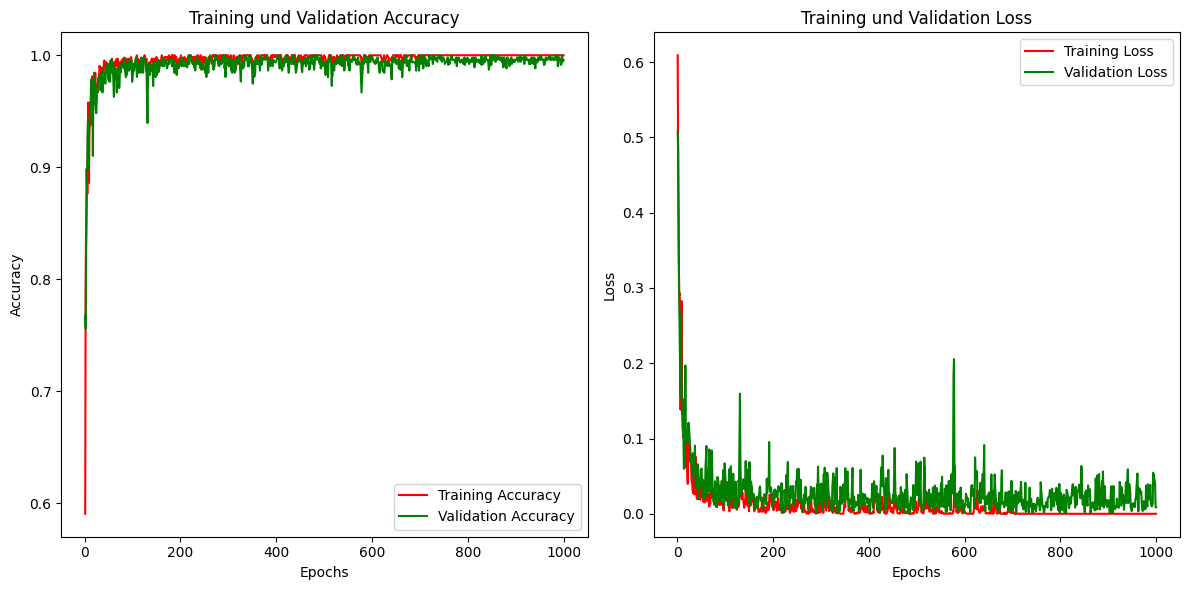

In [8]:
# Zugriff auf die Metriken aus dem history-Objekt
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

for i in range(len(val_accuracy)):
    if val_accuracy[i] < 10e-8:
        if i < (len(val_accuracy)-1) and i > 0:
            val_accuracy[i] = (val_accuracy[i-1]+val_accuracy[i+1])/2
        elif i > 0:
            val_accuracy[i] = val_accuracy[i-1]
        else:
            val_accuracy[i] = val_accuracy[i+1]

    if val_loss[i] < 10e-8:
        if i < (len(val_accuracy)-1) and i>0:
            val_loss[i] = (val_loss[i-1]+val_loss[i+1])/2
        elif i > 0:
            val_loss[i] = val_loss[i-1]
        else:
            val_loss[i] = val_loss[i+1]


# Zugriff auf die Anzahl der Epochen
epochs = range(1, len(train_accuracy) + 1)
plt.figure(figsize=(12, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'g', label='Validation Accuracy')
plt.title('Training und Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training und Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [7]:
# Verzeichnis mit den Testdaten
test_dir = './Test/'

# ImageDataGenerator für Testdaten
test_datagen = ImageDataGenerator(rescale=1/255)

# Generator für Testdaten
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=batchsize,
    class_mode='binary'
)

# Modell laden
#model = tf.keras.models.load_model('dein_model.h5')

# Modell auf Testdaten evaluieren
eval_result = model.evaluate(test_generator)

# Ausgabe von Genauigkeit und Verlust
print("Test Genauigkeit:", eval_result[1])
print("Test Verlust:", eval_result[0])


Found 2000 images belonging to 2 classes.
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9972 - loss: 0.0113
Test Genauigkeit: 0.9959999918937683
Test Verlust: 0.018639041110873222
